In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import math
import matplotlib.backends.backend_pdf
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [38]:
read_all = pd.read_csv('E:\data\consolidated_1.csv')
read_all[:5]

ACID  Flight_instance_ID  Year  Month  Day  Hour  Minute  Second  \
0   676     676200405112006  2004      5   11    20       6       0   
1   676     676200405112006  2004      5   11    20       6       1   
2   676     676200405112006  2004      5   11    20       6       2   
3   676     676200405112006  2004      5   11    20       6       3   
4   676     676200405112006  2004      5   11    20       6       4   

         ABRK     ELEV_1 ...     BPGR_2     BPYR_1  BPYR_2  CALT   CASS  \
0  119.983559  19.044380 ...  29.296949  53.711075     0.0     0  135.0   
1  119.983559  19.044380 ...  29.296949  53.711075     0.0     0  135.0   
2  119.983559  19.044380 ...  24.414124  48.828247     0.0     0  135.0   
3  119.983559  19.064838 ...  29.296949  48.828247     0.0     0  135.0   
4  119.983559  19.064838 ...  29.296949  48.828247     0.0     0  135.0   

        CRSS  DFGS   DWPT  EAI  FF  
0 -29.091582     1  75024    0   0  
1 -29.091582     1  75024    0   0  
2 -29.091582     1  75024    0   0  
3 -29.091582     1  75024    0   0  
4 -29.091582     1  75024    0   0  

[5 rows x 226 columns]

In [39]:
read_one_instance = read_all[read_all['Flight_instance_ID']==676200405112006]
read_one_instance.to_csv("E:\data\one_instance.csv")

In [40]:
data_p2_read = pd.read_csv('E:\data\TRAIN_2\ph_3.csv')
data_p2_test = pd.read_csv('E:\data\ph_3_test.csv')
data_p2_test = data_p2_test[data_p2_read.columns.values]
data_p2_test[:5]

ACID  Flight_instance_ID  Year  Month  Day  Hour  Minute  Second  \
0   676     676200104290501  2001      4   29     5       9      44   
1   676     676200104290501  2001      4   29     5       9      45   
2   676     676200104290501  2001      4   29     5       9      46   
3   676     676200104290501  2001      4   29     5       9      47   
4   676     676200104290501  2001      4   29     5       9      48   

         ABRK    ELEV_1  ...       BPGR_2     BPYR_1  BPYR_2  CALT   CASS  \
0  119.983559  1.368668  ...     0.000000  58.593899     0.0     0  131.0   
1  119.983559 -4.175449  ...    39.062599  58.593899     0.0     0  131.0   
2  119.983559 -5.627968  ...    39.062599  58.593899     0.0     0  131.0   
3  119.983559 -7.203236  ...     0.000000  53.711075     0.0     0  131.0   
4  119.983559 -7.960178  ...    39.062599  58.593899     0.0     0  131.0   

        CRSS  DFGS   DWPT  EAI     FF  
0 -139.04199     1  60496    0  11308  
1 -139.04199     1  60496    0  12038  
2 -139.04199     1  60496    0  12206  
3 -139.04199     1  60496    0  12166  
4 -139.04199     1  60496    0  12080  

[5 rows x 226 columns]

In [41]:
data_p2_columns = data_p2_read.iloc[:,9:]

time_data = data_p2_read.iloc[:,:8]
FF = data_p2_read[['FF']]
# Frames is the 2 DF's that will be concatenated
frames = [time_data.T, data_p2_columns.T]


In [42]:
data_p2_columns_test = data_p2_test.iloc[:,9:]

time_data_test = data_p2_test.iloc[:,:8]
FF_test = data_p2_test[['FF']]
# Frames is the 2 DF's that will be concatenated
frames_test = [time_data_test.T, data_p2_columns_test.T]


In [43]:
data_p2_sample = pd.concat(frames).T
data_p2_sample_test = pd.concat(frames_test).T

#sample_idx = int(round(0.1*len(data_p2_sample),0))

flight_features=data_p2_columns.columns.values

In [44]:
import copy
data_p3_sample = copy.deepcopy(data_p2_sample)
data_p3_sample['total_sec'] = data_p3_sample['Hour'].map(int) * 3600+ data_p3_sample['Minute'].map(int) *60 + data_p3_sample['Second'].map(int)
print data_p2_sample.shape
print data_p3_sample.shape

(6754, 225)
(6754, 226)


In [45]:
data_p3_sample_test = copy.deepcopy(data_p2_sample_test)
data_p3_sample_test['total_sec'] = data_p3_sample_test['Hour'].map(int) * 3600+ data_p3_sample_test['Minute'].map(int) *60 + data_p3_sample_test['Second'].map(int)
print data_p2_sample_test.shape
print data_p3_sample_test.shape

(5181, 225)
(5181, 226)


In [46]:
exclude_var=['ACID','Flight_instance_ID','Year','Month','Day','Hour','Minute','Second','total_sec']
for i in exclude_var:
    del data_p3_sample_test[i]
    del data_p3_sample[i]

In [47]:
import time
from sklearn.ensemble import RandomForestRegressor
class rfError:
    def __init__(self):
        self.rmse = None
        self.ymean = None
        self.mape = None
    def cv_rf(self, 
              df_train, 
              df_test, 
              sample = None):
        
        if sample == None:
            sample = 0.2
        else:
            sample = sample
        rf = RandomForestRegressor()
        
        rmse_store = []
        y_mean_store = []
        df_train = df_train.sample(frac=sample, random_state=42)
        
        X_train = df_train.ix[:,8:].drop(['FF'],axis=1)
        y_train = df_train['FF']
        X_test =  df_test.ix[:,8:].drop(['FF'], axis=1)
        y_test = df_test['FF']
            
        rf.fit(X_train,y_train)
        rmse = np.mean((rf.predict(X_test) - y_test)**2)**0.5
        rmse_store.append(rmse)
        y_mean_store.append(np.mean(y_test))
            
        self.rmse = np.mean(rmse_store)
        self.ymean = np.mean(y_mean_store)
        self.mape = np.mean(1.0 * self.rmse / self.ymean)
t0 = time.time()
# Initialize function
rfe = rfError()
# Fit and predict model
rfe.cv_rf(data_p3_sample, data_p3_sample_test,sample=1)
print rfe.rmse
print rfe.mape

280.33170463
0.0262471580012


In [48]:
# Create new column for min and sec as a decimal. For example 1 min 20 sec would be 1.3
data_p2_sample['min_sec'] = data_p2_sample['Minute'].map(int) + (data_p2_sample['Second'].map(float))/60

# Create new column for hour and minute as a decimal. For example, 1 hour 20 min 00 sec would be 1.3.
data_p2_sample['hour_min'] = data_p2_sample['Hour'] + (data_p2_sample['min_sec'] / 60)
data_p2_sample['hour_min'][:5]
# Hour and time refers to the clock time, not time elapsed


0    5.22222
1     5.2225
2    5.22278
3    5.22306
4    5.22333
Name: hour_min, dtype: object

In [49]:
# Make Flight Instance ID a string
data_p2_sample['Flight_instance_ID'] = data_p2_sample['Flight_instance_ID'].map(lambda x: str("{}".format(x)))


In [50]:
# List of flight indexes for each flight instance
test_indexes = list(enumerate(data_p2_sample['Flight_instance_ID'].unique()))

# Create function to search for flight index if you only know the flight instance
def get_flight_instance_index(instance_num):
    index_match = [index for index, instance in test_indexes if instance_num == instance]
    return "".join(str(index_match[0]))
# Create function to plot 
def make_dual_plot(feature, flight_index):  
    test_instance = data_p2_sample['Flight_instance_ID'].unique()[flight_index]
    test_flight_data = data_p2_sample[data_p2_sample['Flight_instance_ID'] == test_instance]
    # Fuel Flow
    fig, ax1 = plt.subplots()
    x = test_flight_data['hour_min']
    y1_ff = test_flight_data['FF']
    ax1.plot(x,y1_ff, color='r')
    ax1.set_ylabel('FF')
    plt.legend(loc=1)
    # Second variable
    y2_variable = feature
    y2 = test_flight_data[y2_variable]
    ax2 = ax1.twinx()
    ax2.plot(x,y2)
    ax2.set_ylabel(y2_variable)
    plt.legend(loc=4)
    
    plt.title("FF and {} as a function of time - Flight {}".format(y2_variable, test_instance))
    #pdf.savefig( fig )
#     print "Test Instance:", "ID:",get_flight_instance_index(test_instance),"Instance:",test_instance
    
# print test_indexes[9]
#deleted 'EVNT' : single instance


In [51]:
#Checking unique values in every variable:
var_gt1=[]
var_eq1=[]
for i in data_p2_sample.columns.values:
    if (data_p2_sample[i].unique().shape[0])>1:
        var_gt1.append(i)
    else: 
        var_eq1.append(i)
print var_eq1

['ACID', 'Year', 'EVNT', 'FADF', 'FADS', 'FIRE_1', 'FIRE_2', 'FIRE_3', 'FIRE_4', 'FQTY_3', 'GPWS', 'HF1', 'HF2', 'HYDG', 'HYDY', 'MW', 'N1CO', 'OIPL', 'PH', 'POVT', 'PUSH', 'SMKB', 'SMOK', 'SNAP', 'SPLG', 'SPLY', 'TAI', 'TCAS', 'TMAG', 'VHF2', 'WAI_1', 'WAI_2', 'APUF_Mean', 'APUF_Min', 'APUF_Max', 'TOCW_Mean', 'TOCW_Min', 'TOCW_Max', 'CASM_Mean', 'CASM_Min', 'CASM_Max', 'A_T', 'BPGR_1', 'BPYR_2', 'CALT', 'DFGS']


                      FF
APFD                    
0.0  count     35.000000
     mean   10583.257143
     std      129.701998
     min    10486.000000
     25%    10497.000000
     50%    10528.000000
     75%    10611.000000
     max    10930.000000
2.0  count   6719.000000
     mean   10482.176514
     std      627.684543
     min     6744.000000
     25%    10200.000000
     50%    10560.000000
     75%    10786.000000
     max    12322.000000


C:\Users\stuti\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


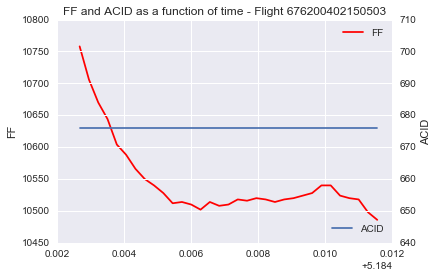

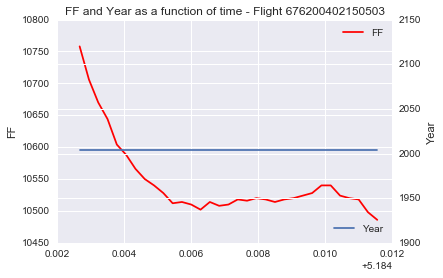

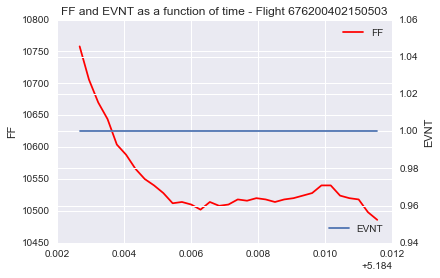

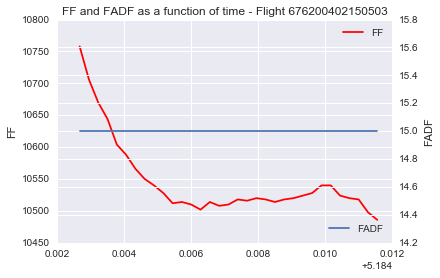

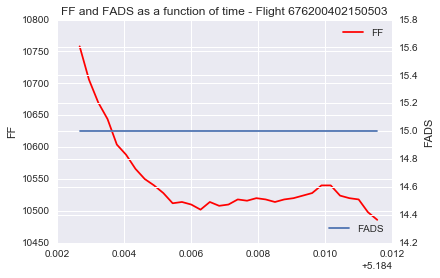

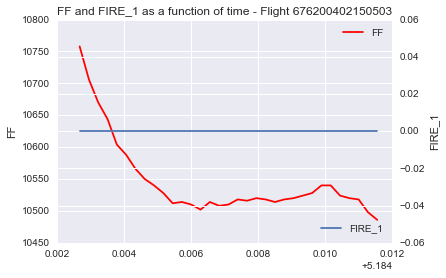

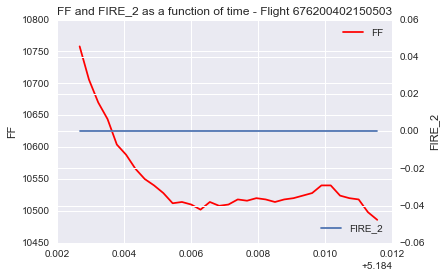

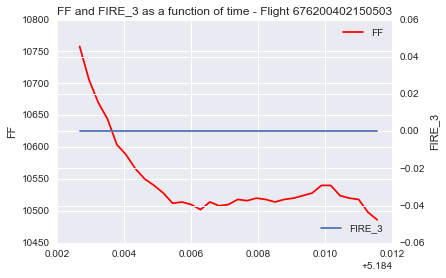

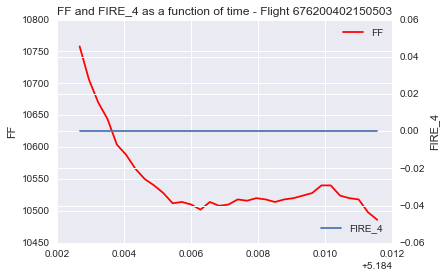

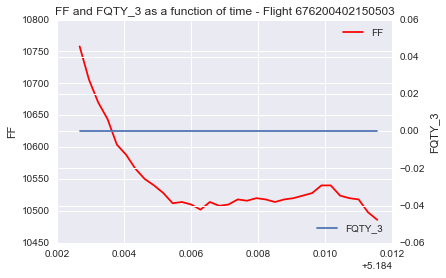

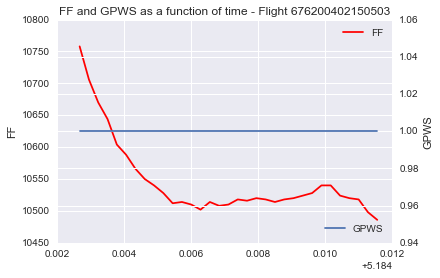

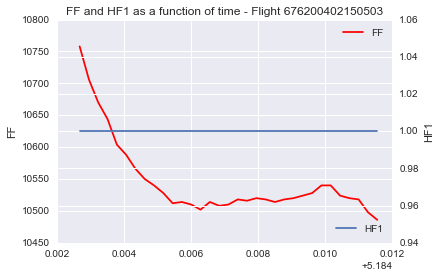

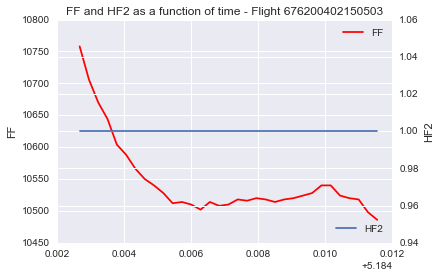

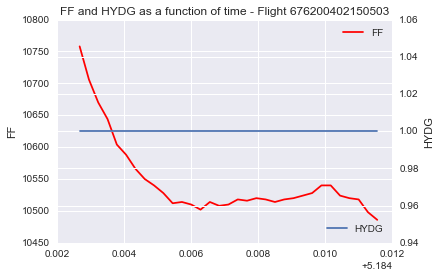

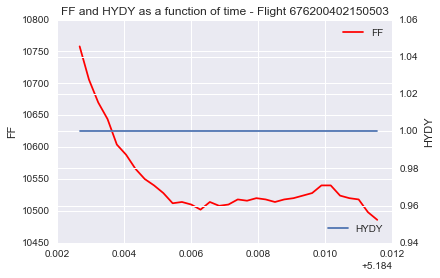

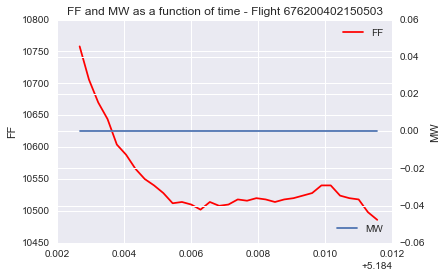

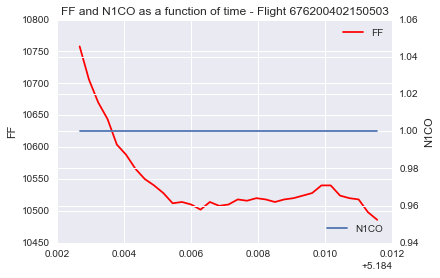

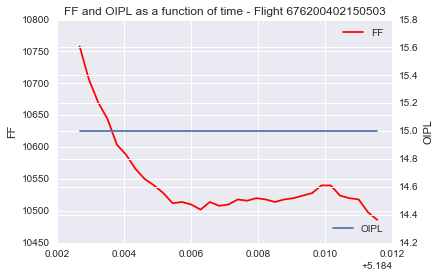

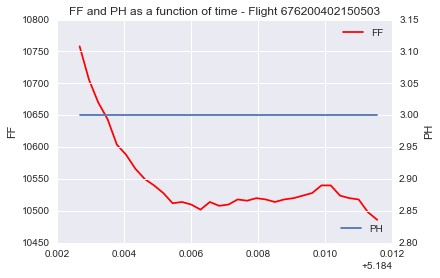

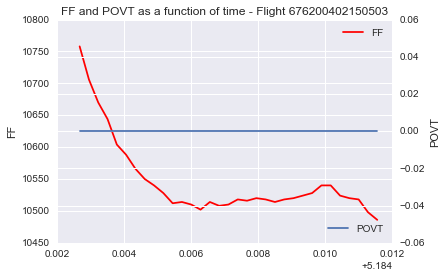

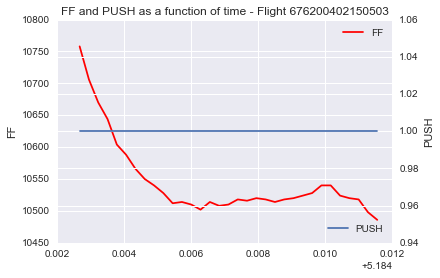

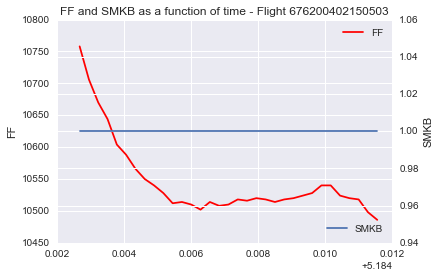

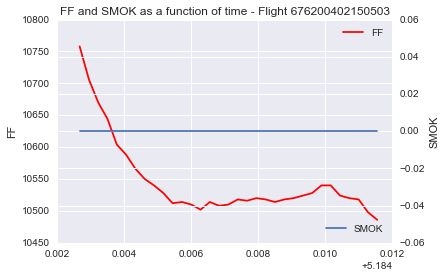

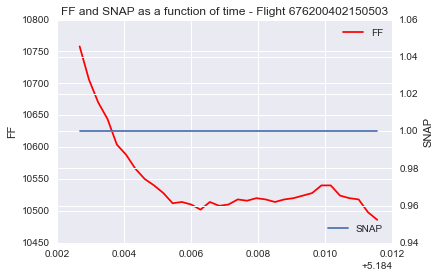

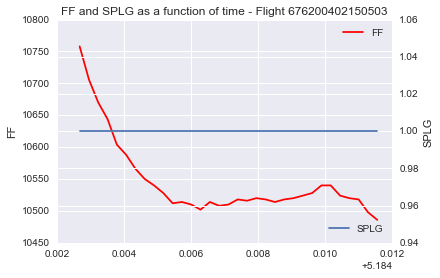

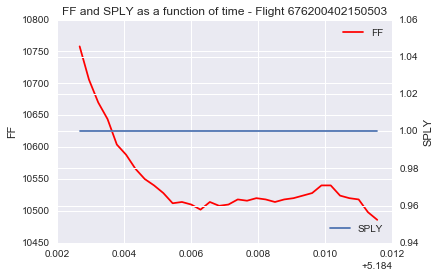

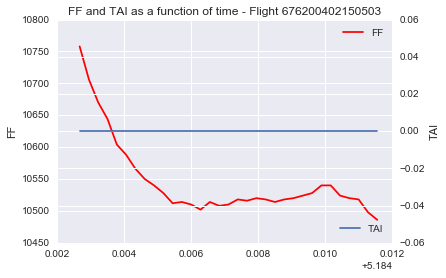

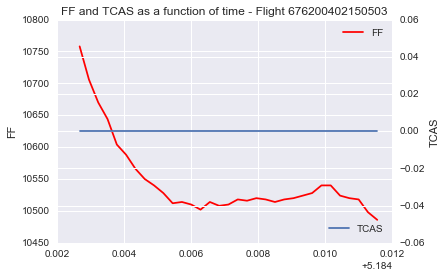

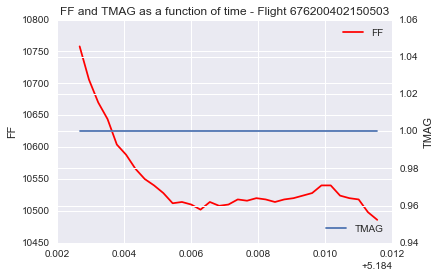

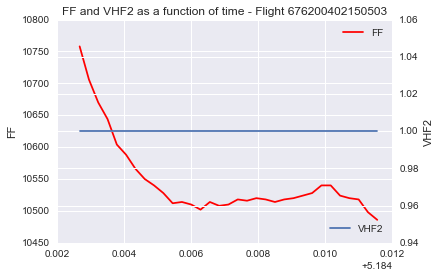

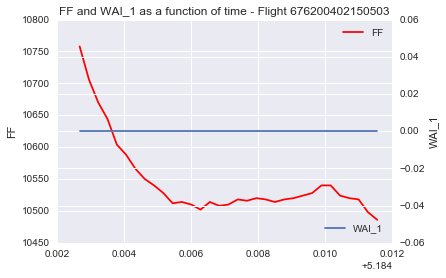

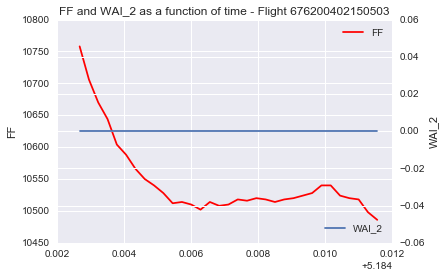

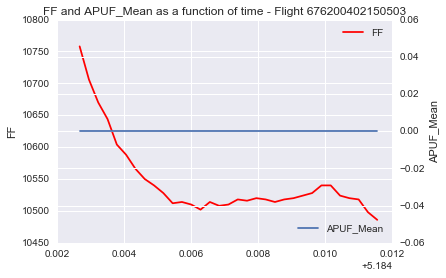

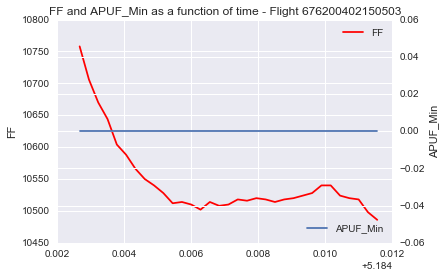

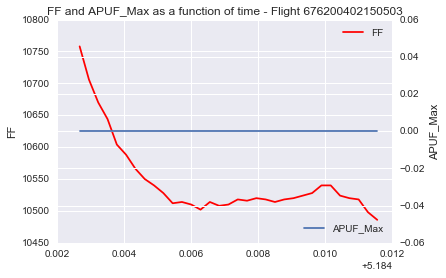

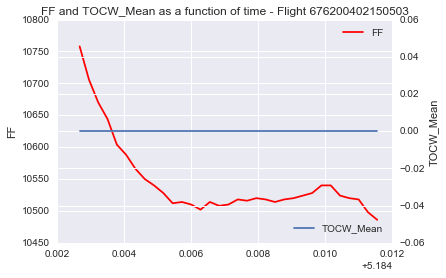

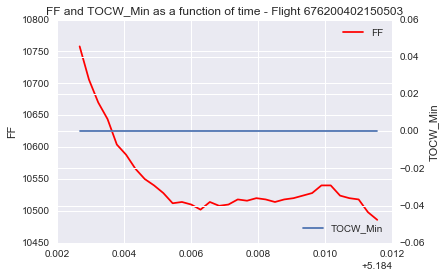

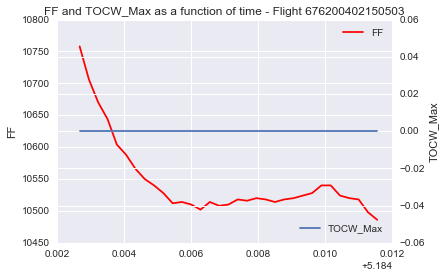

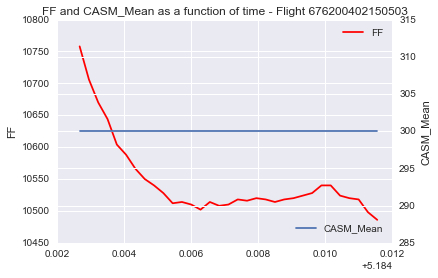

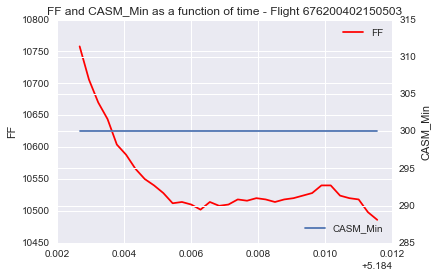

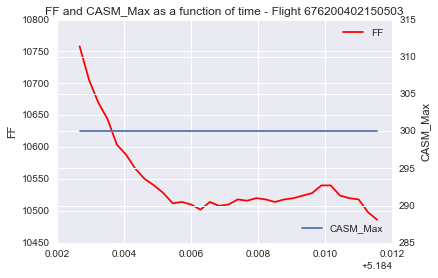

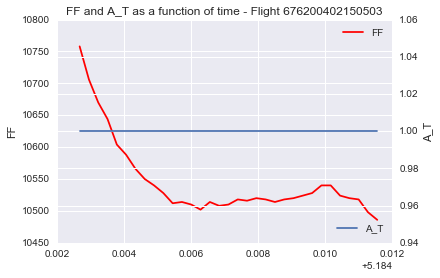

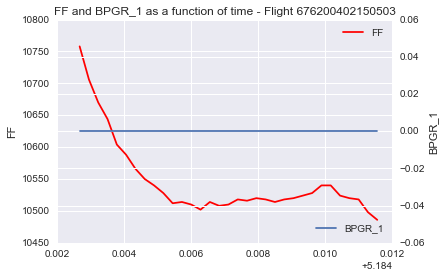

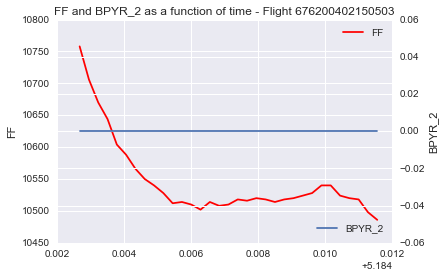

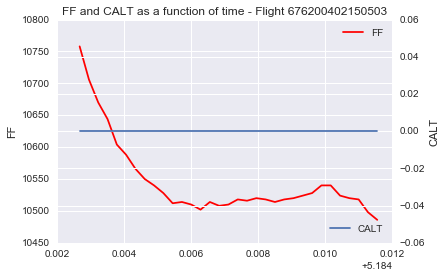

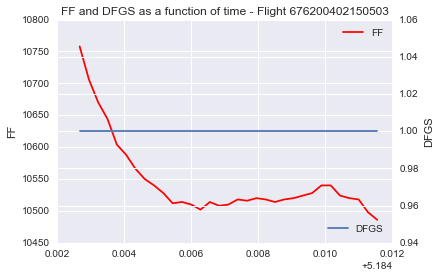

In [52]:
test = data_p2_sample[['APFD','FF']]
test = test.astype(float)
print test.groupby('APFD').describe()
for i in var_eq1:
    make_dual_plot(i,6)


In [53]:
for i in var_eq1:
    del data_p2_sample[i]
data_p2_sample.shape

(6754, 181)

In [58]:
##need to run multiple times##
flight_features = list(flight_features)
for i in flight_features:
    if i in var_eq1:
        flight_features.remove(i)
len(flight_features)

173

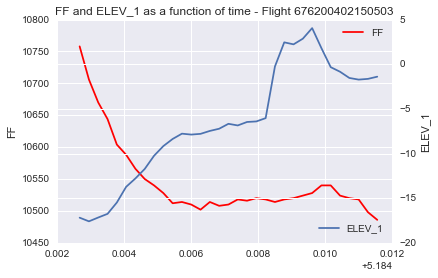

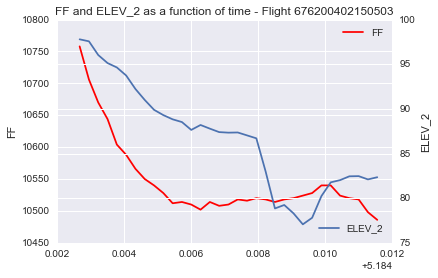

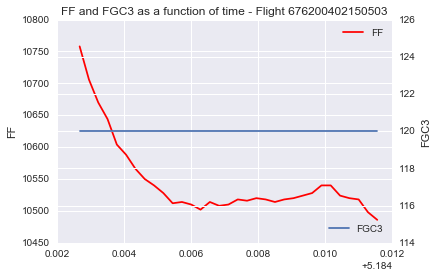

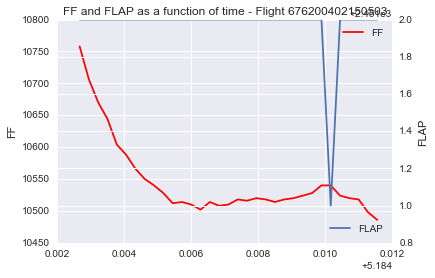

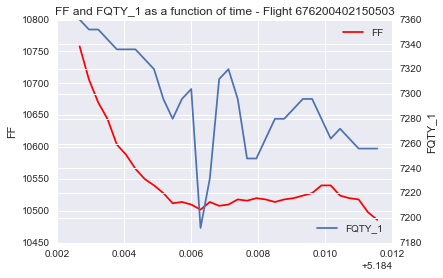

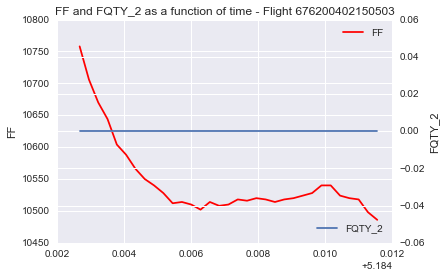

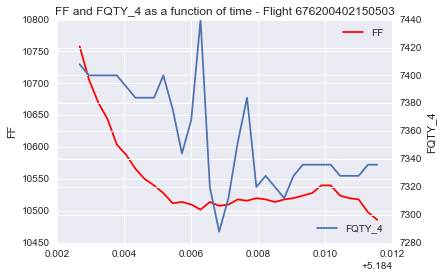

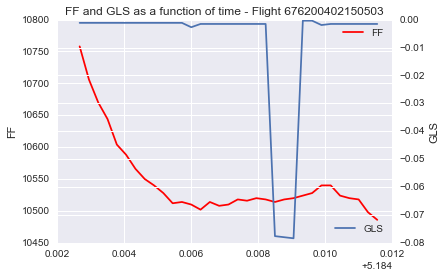

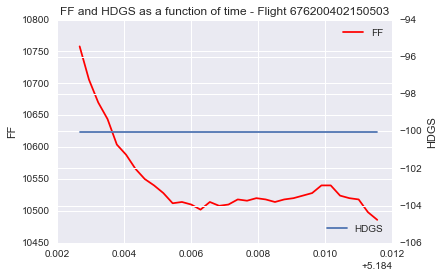

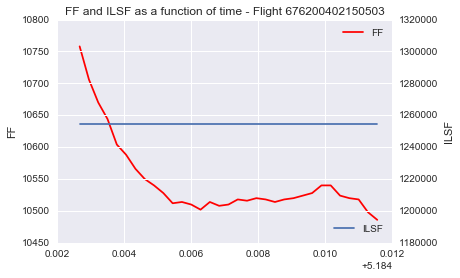

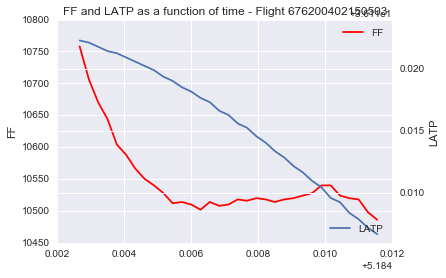

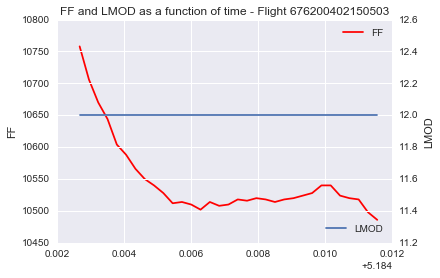

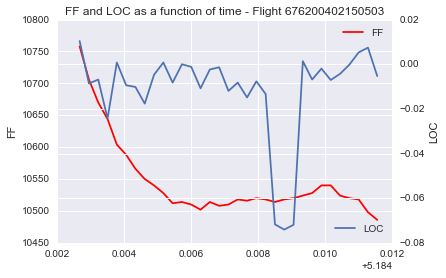

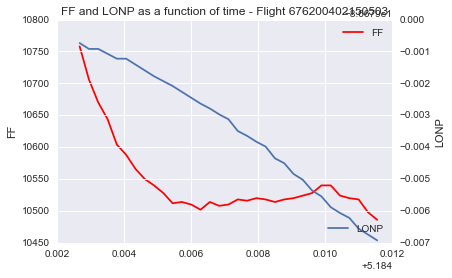

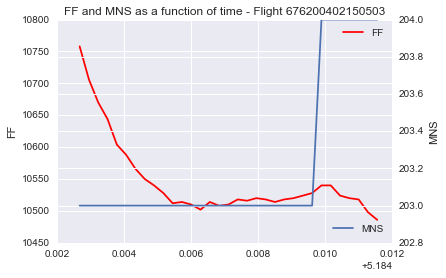

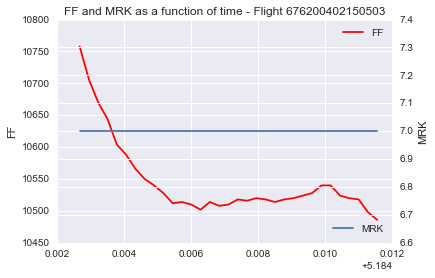

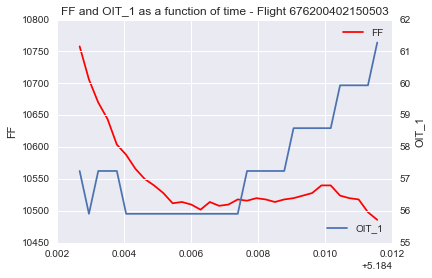

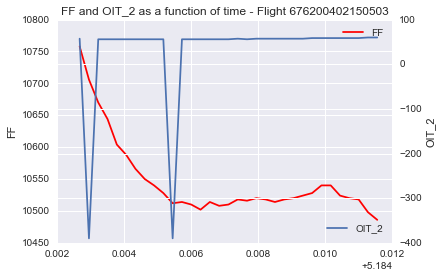

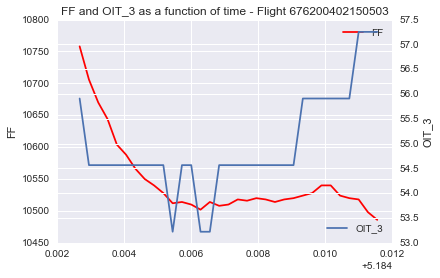

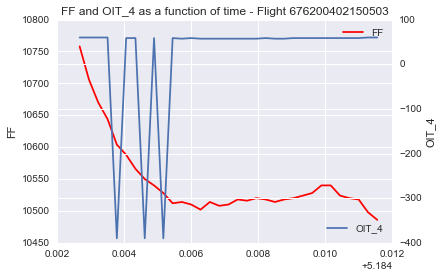

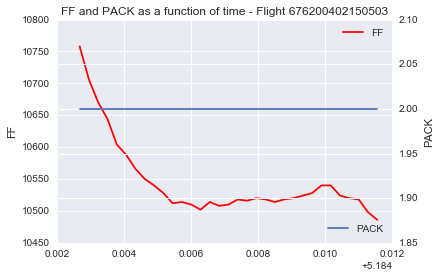

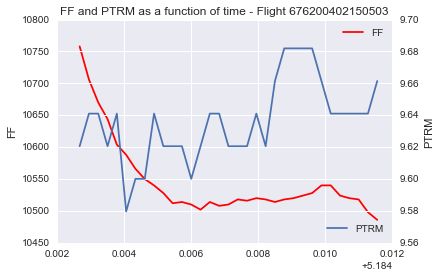

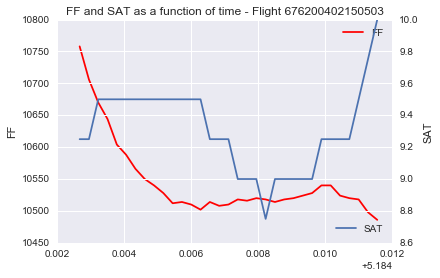

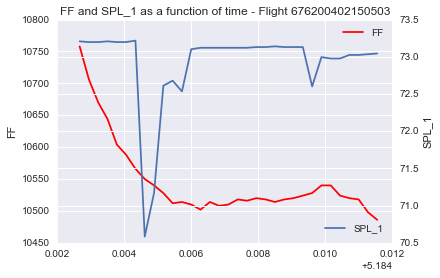

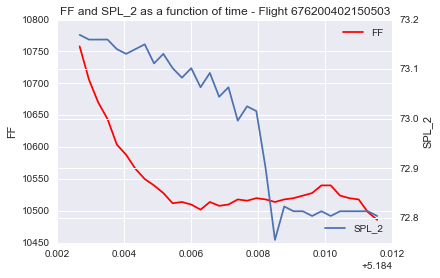

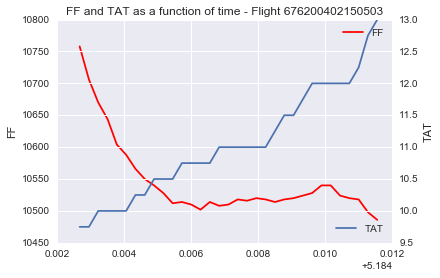

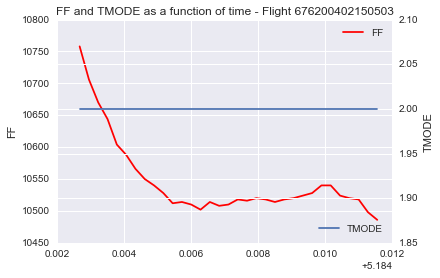

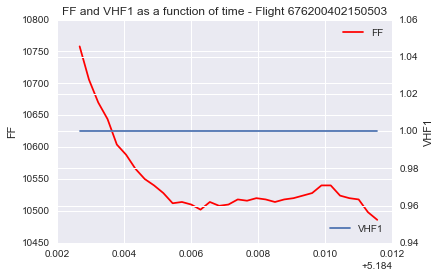

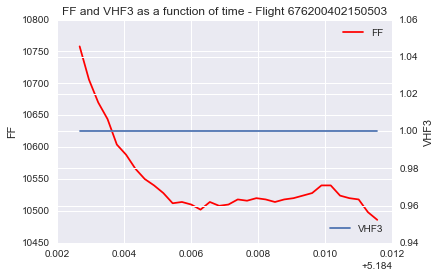

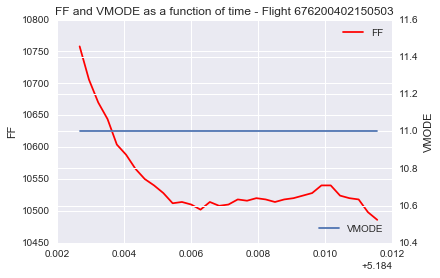

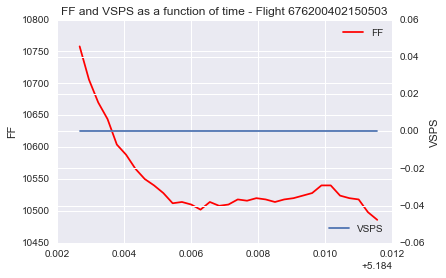

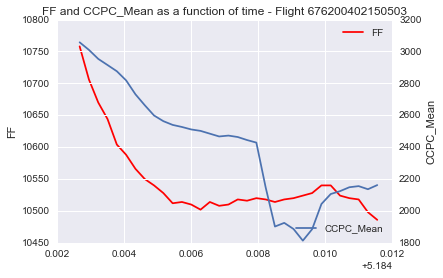

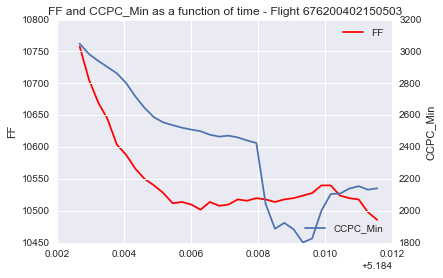

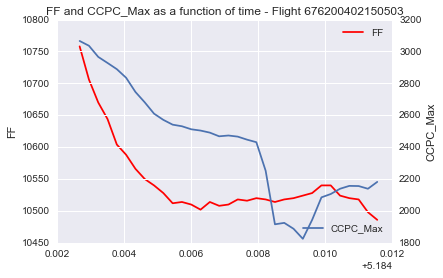

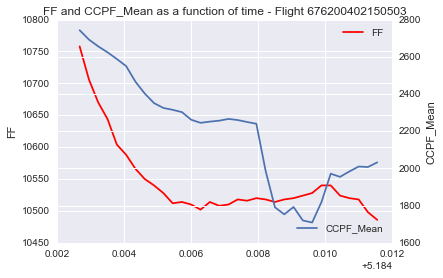

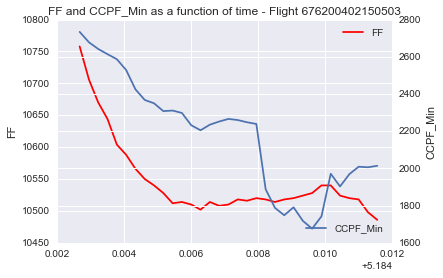

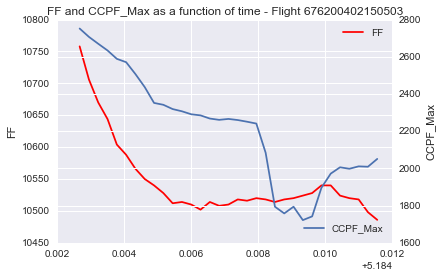

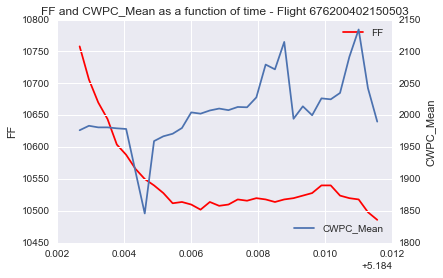

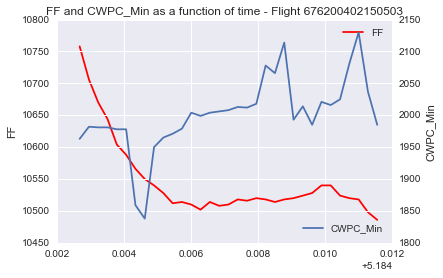

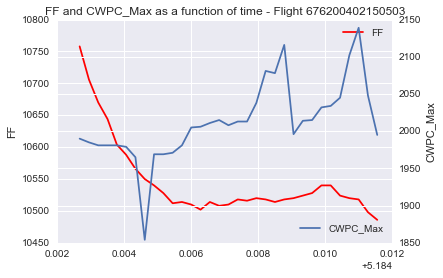

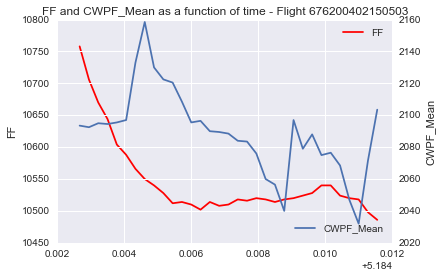

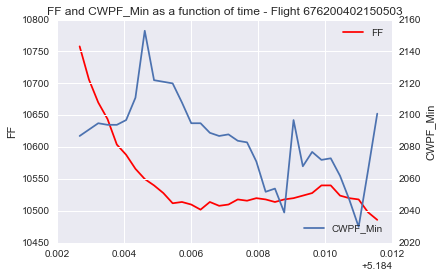

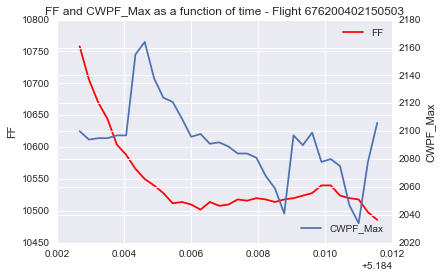

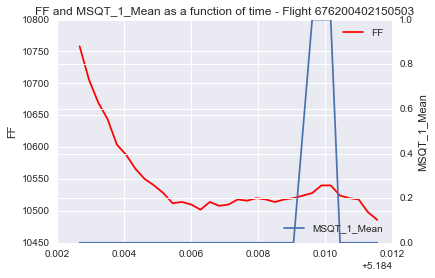

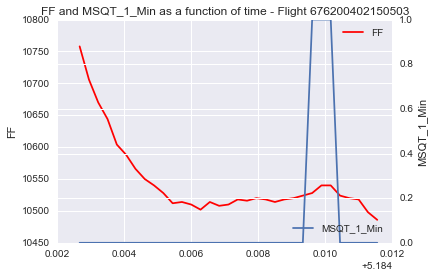

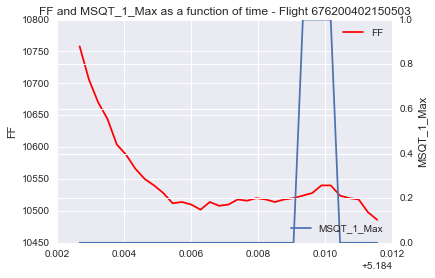

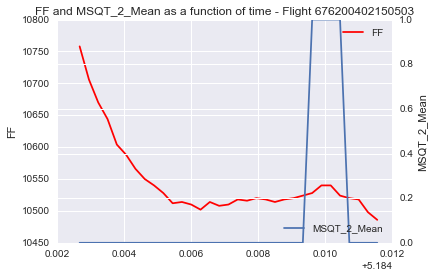

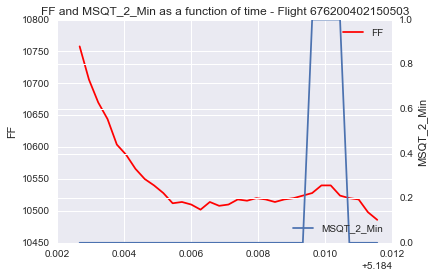

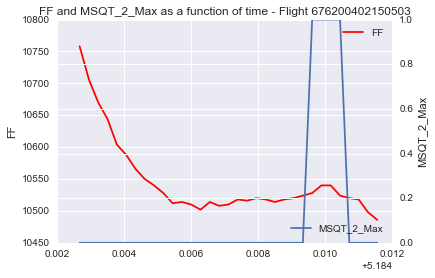

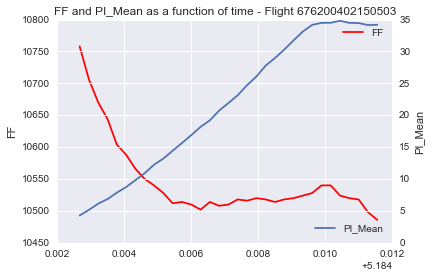

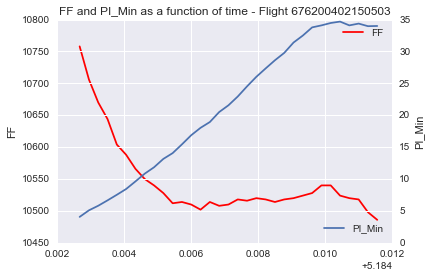

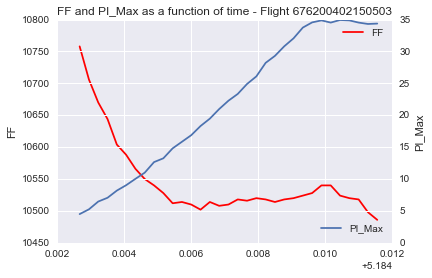

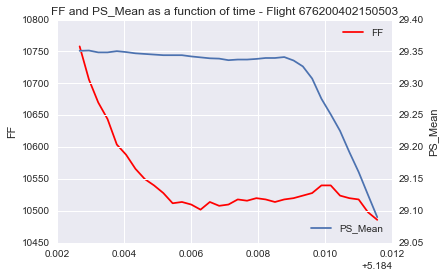

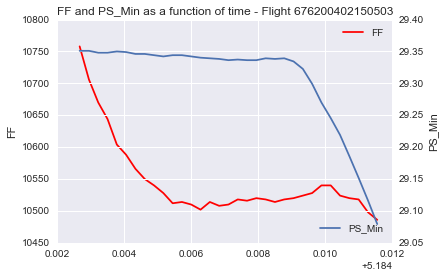

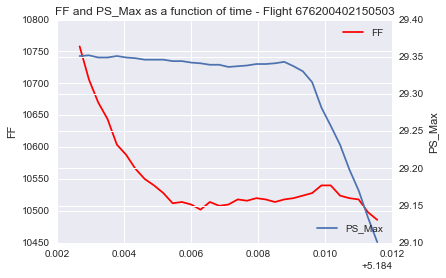

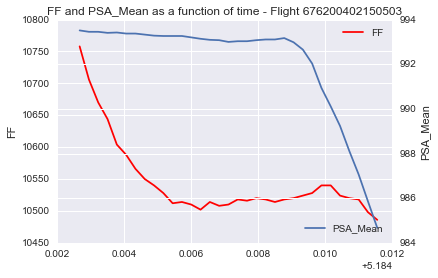

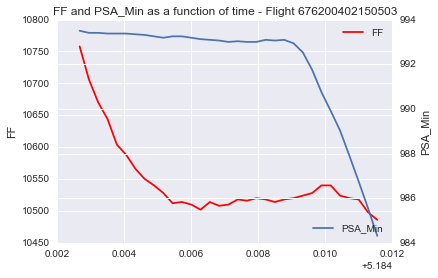

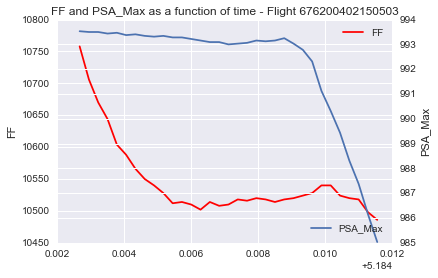

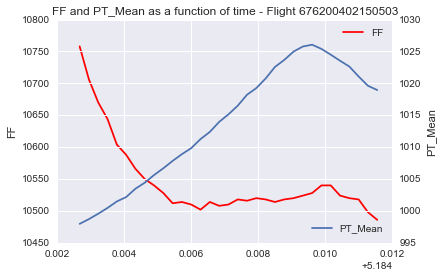

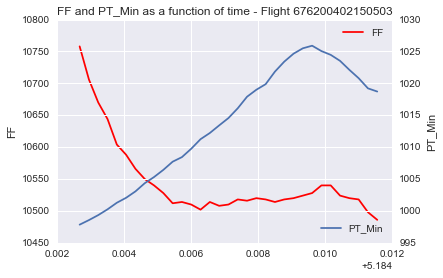

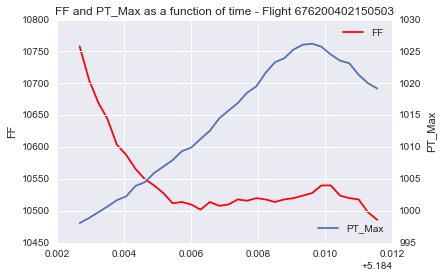

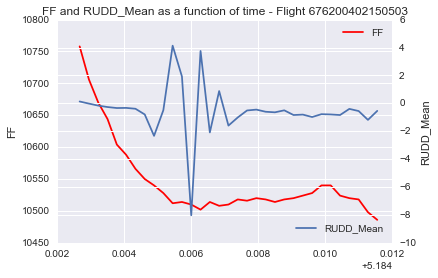

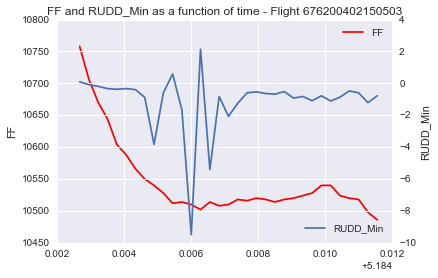

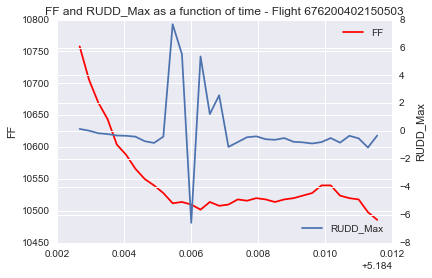

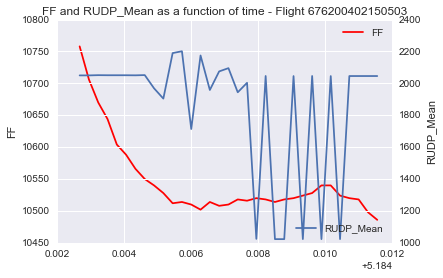

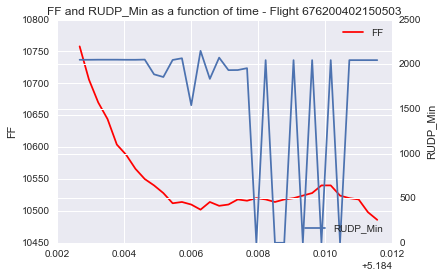

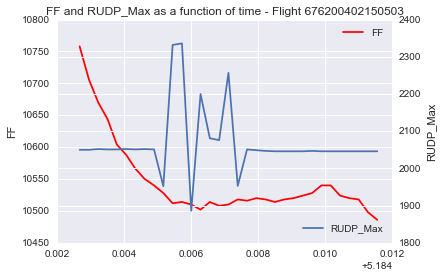

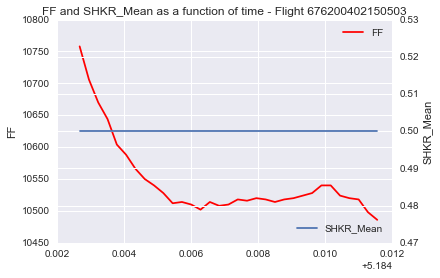

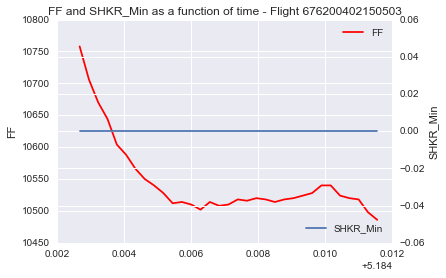

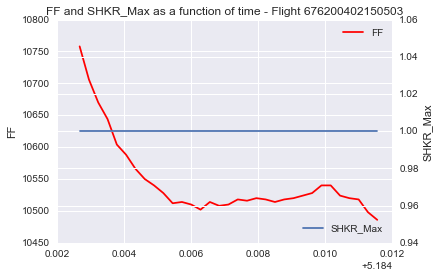

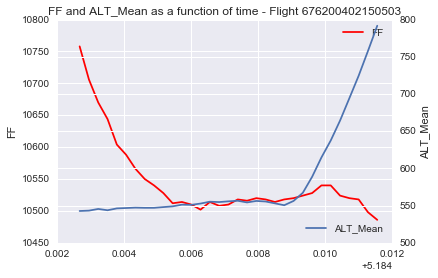

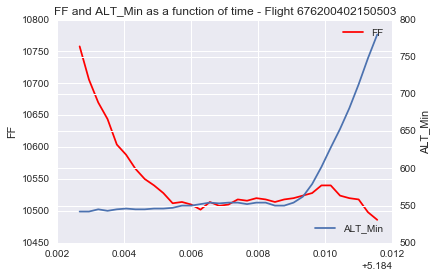

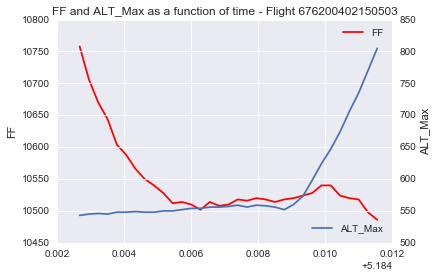

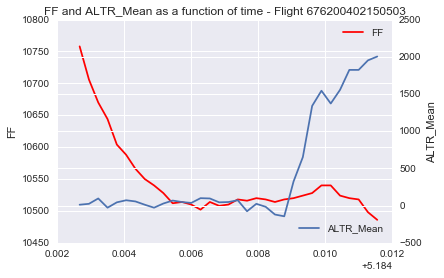

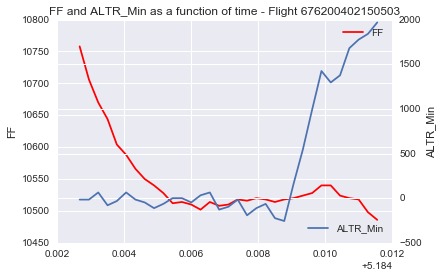

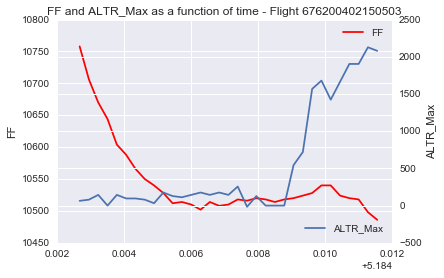

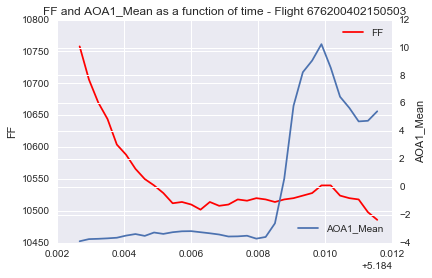

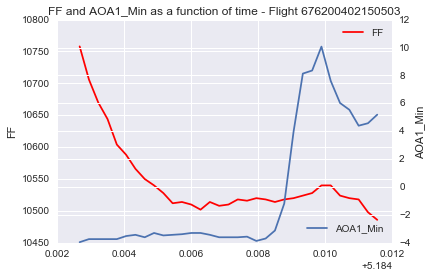

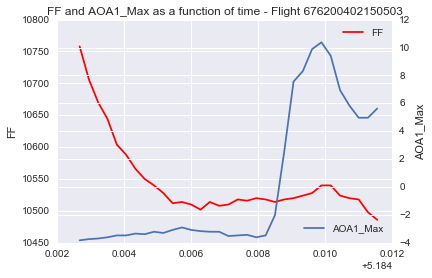

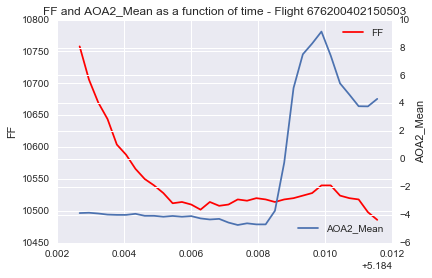

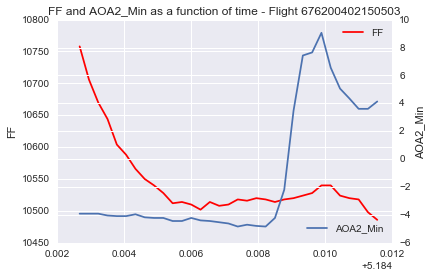

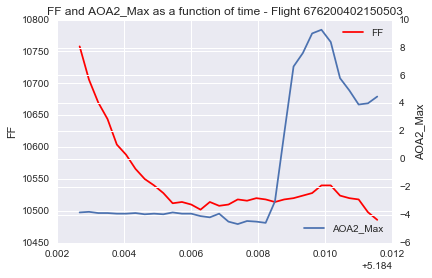

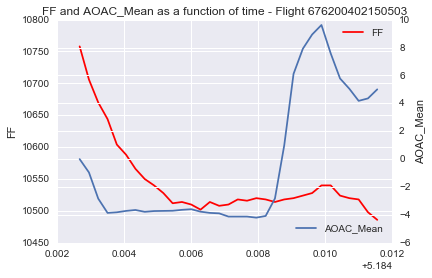

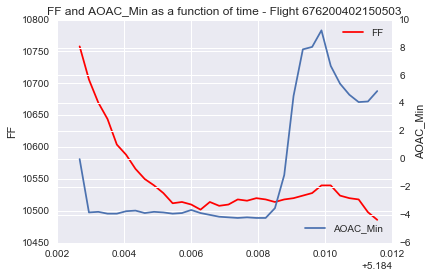

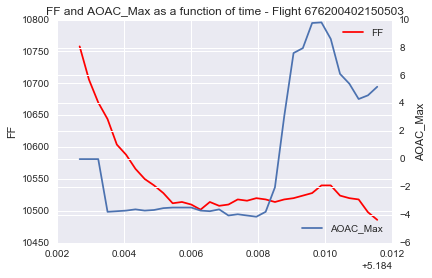

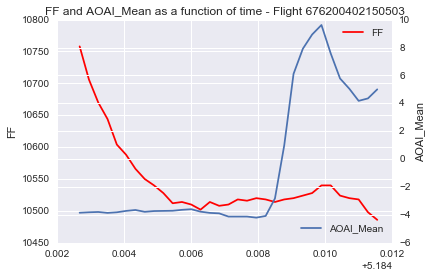

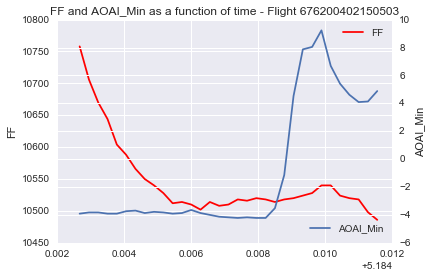

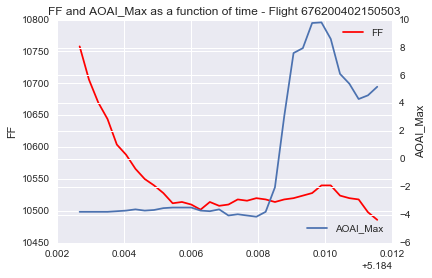

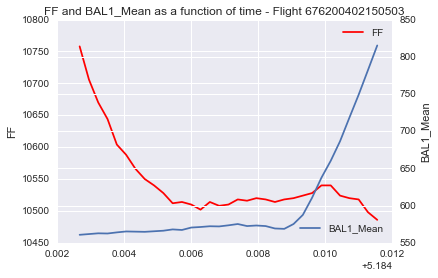

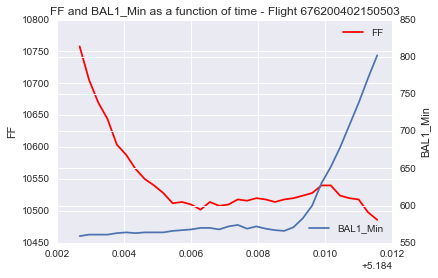

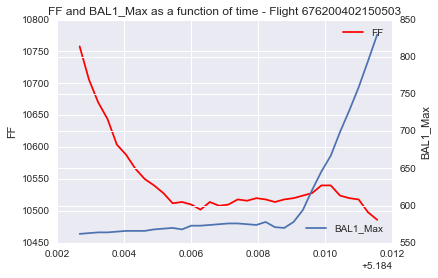

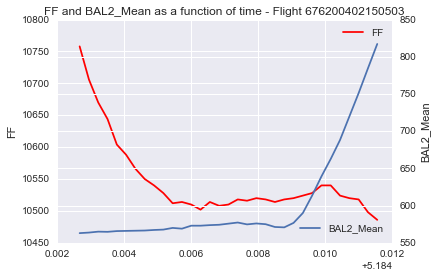

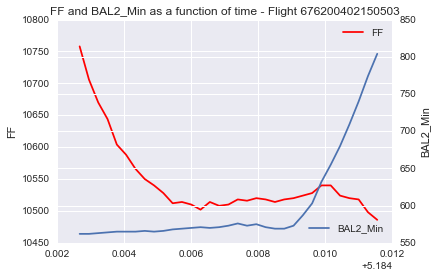

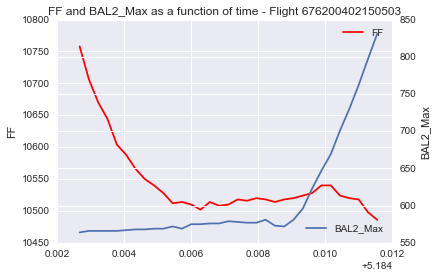

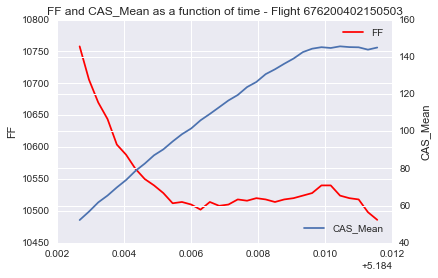

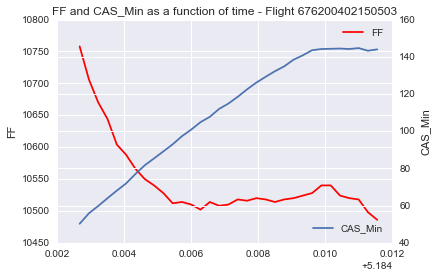

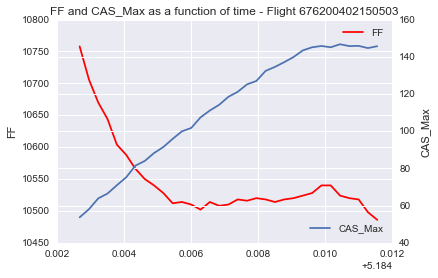

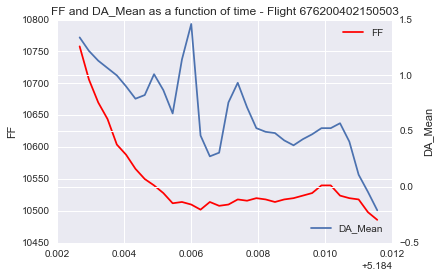

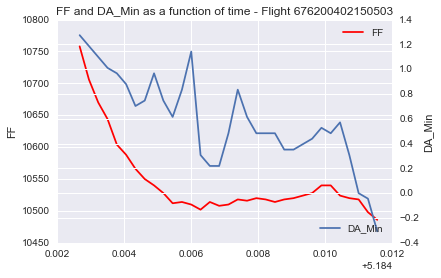

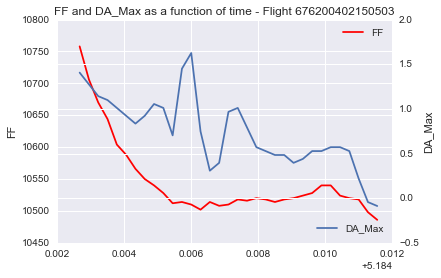

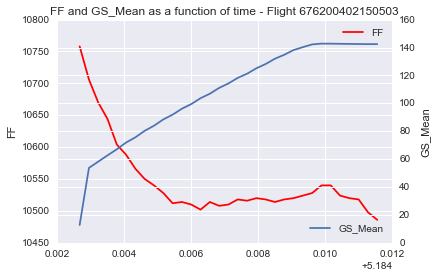

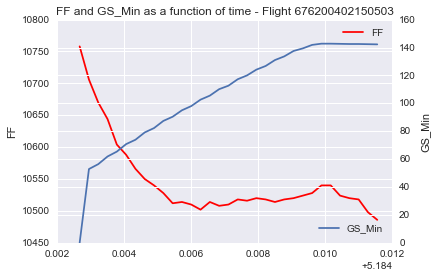

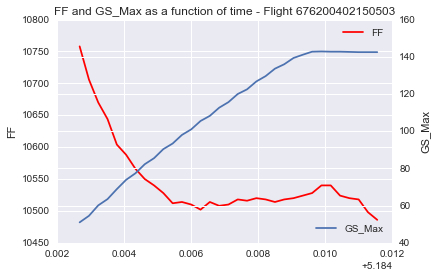

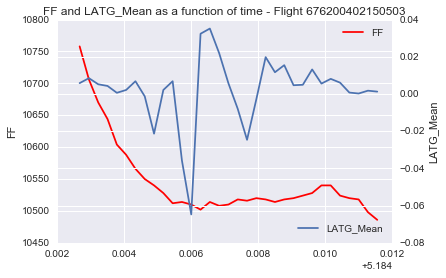

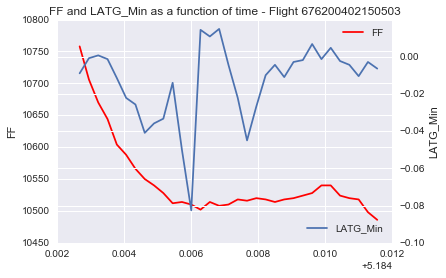

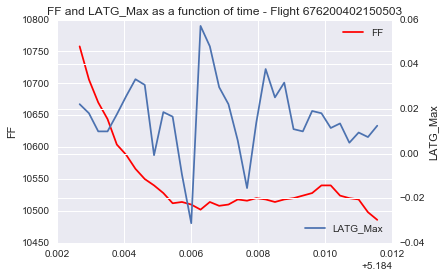

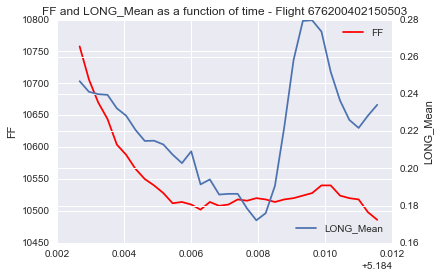

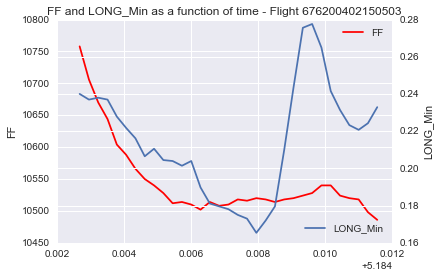

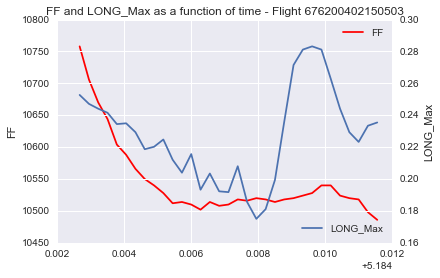

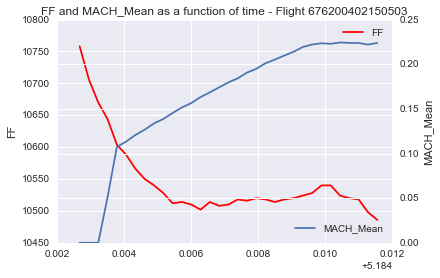

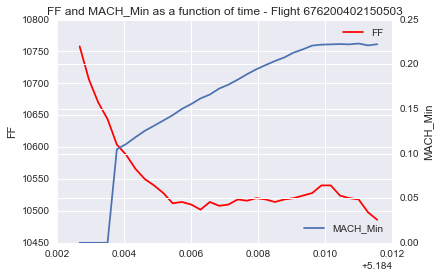

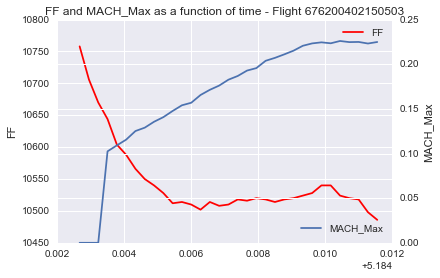

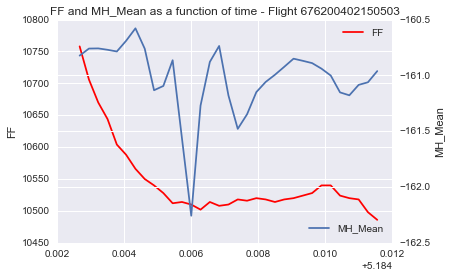

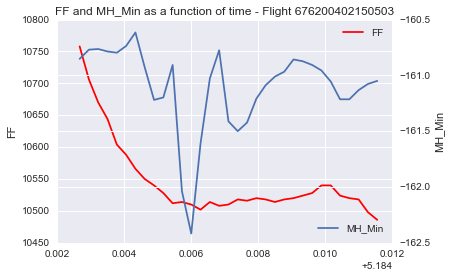

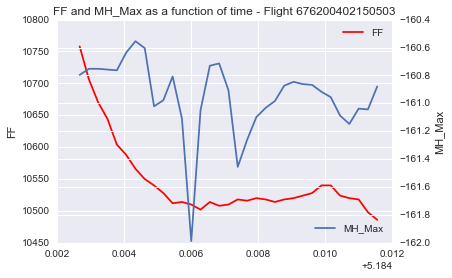

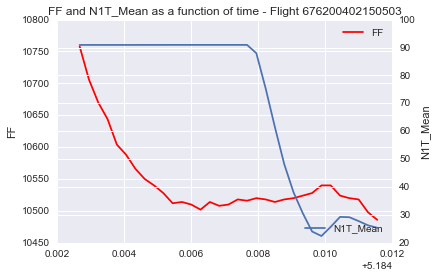

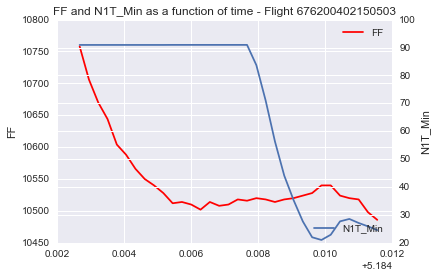

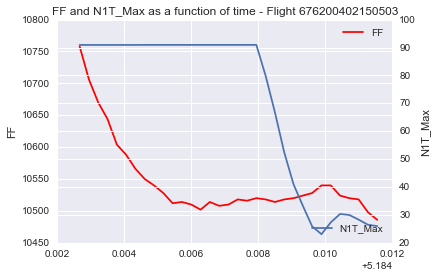

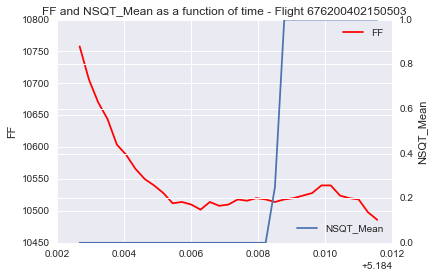

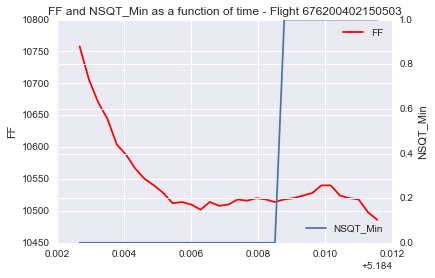

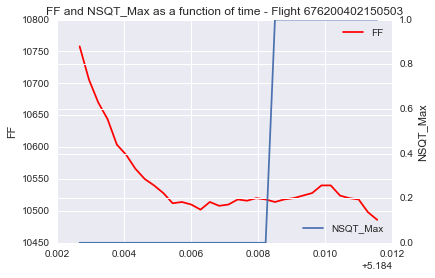

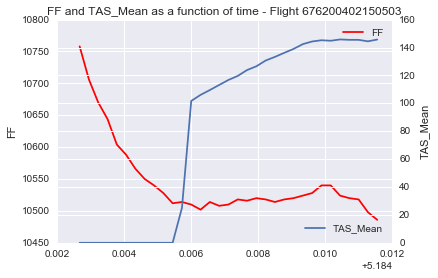

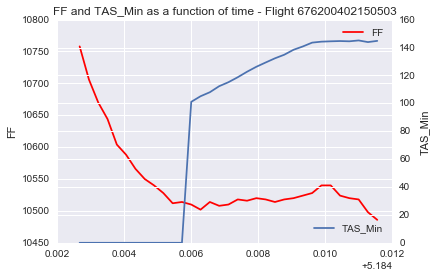

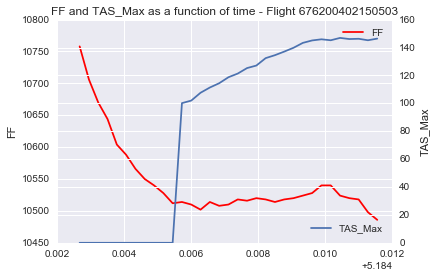

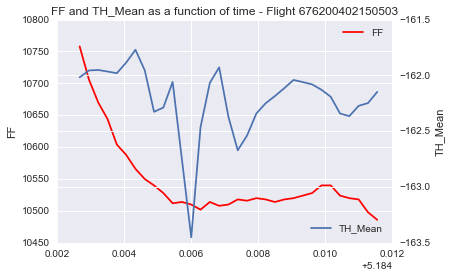

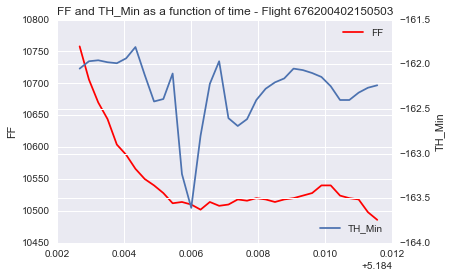

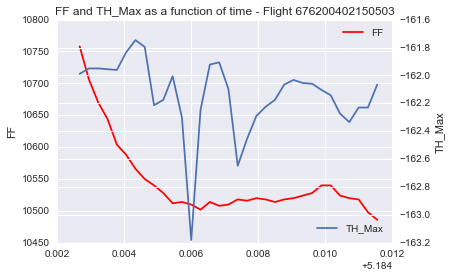

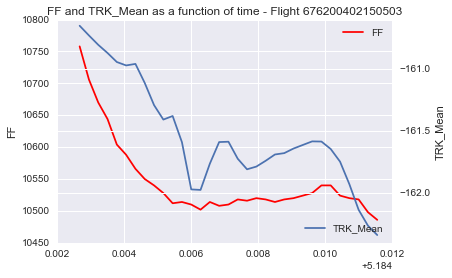

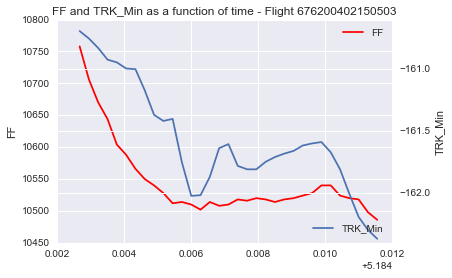

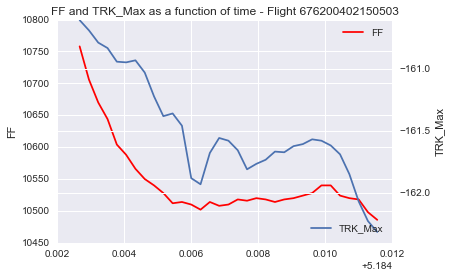

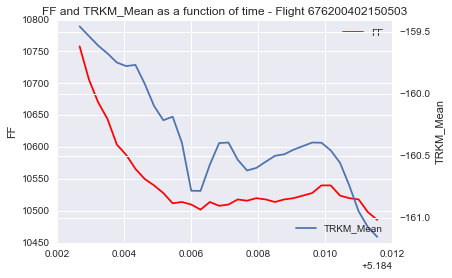

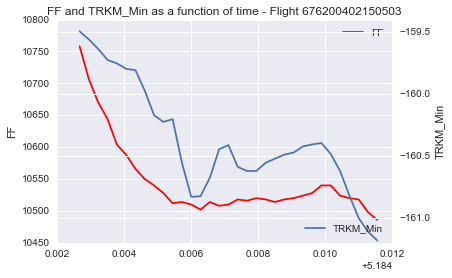

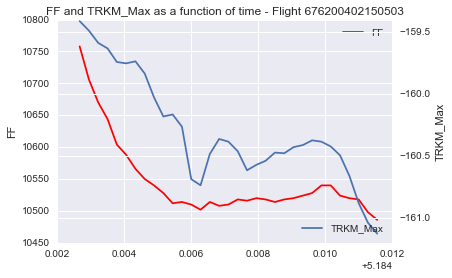

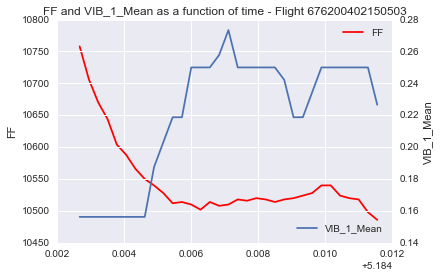

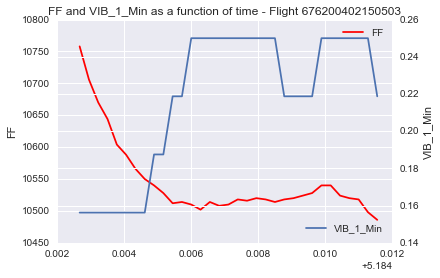

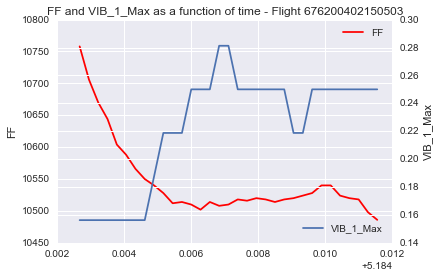

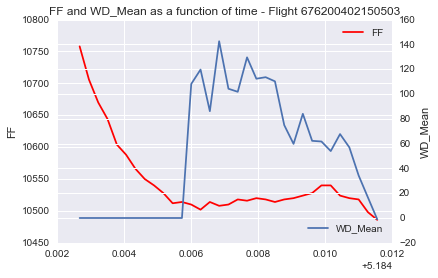

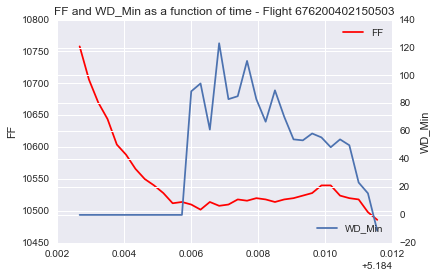

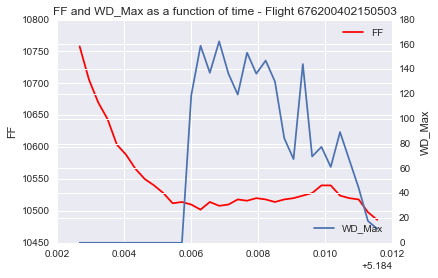

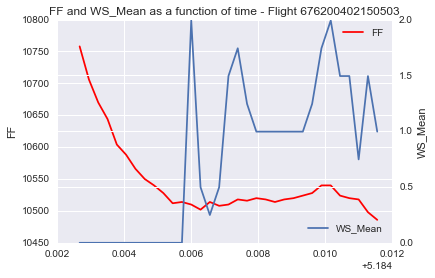

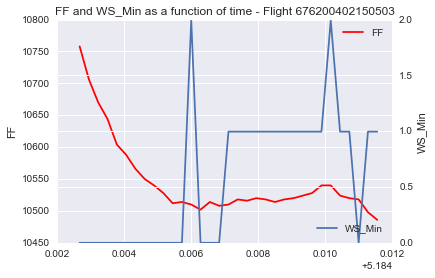

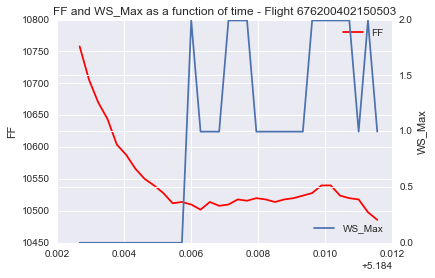

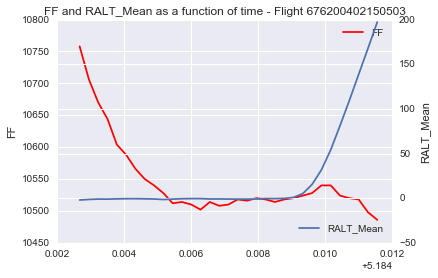

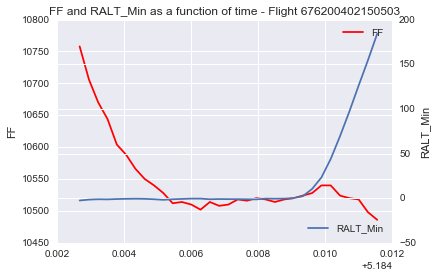

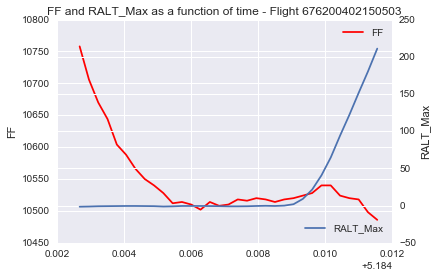

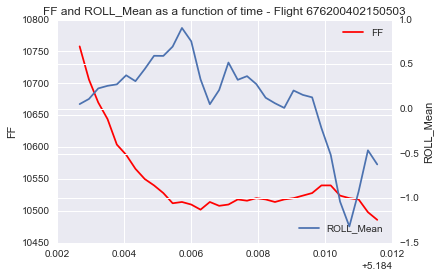

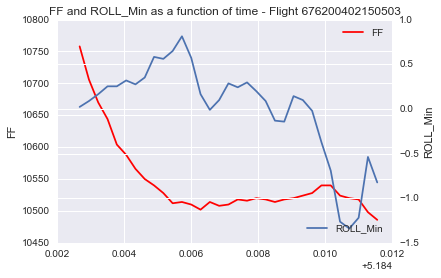

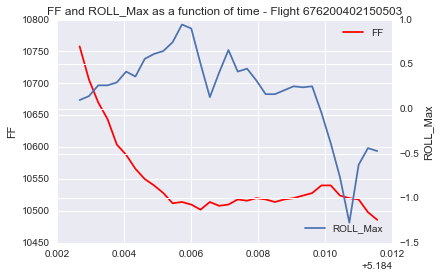

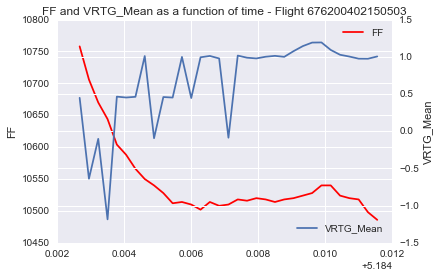

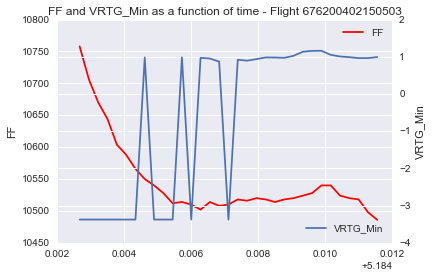

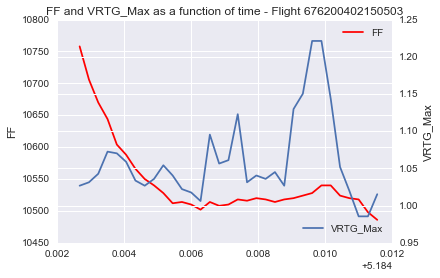

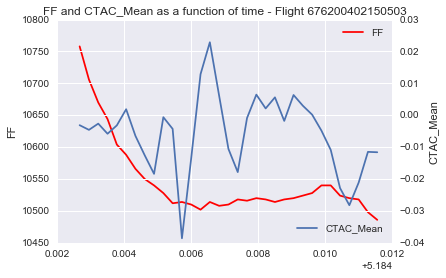

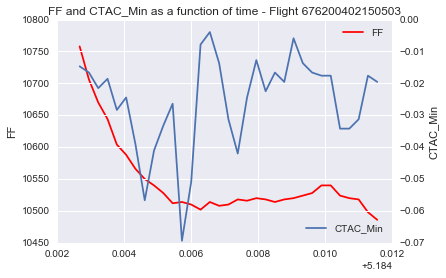

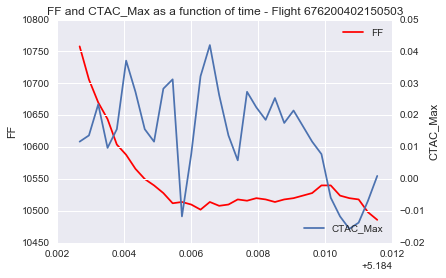

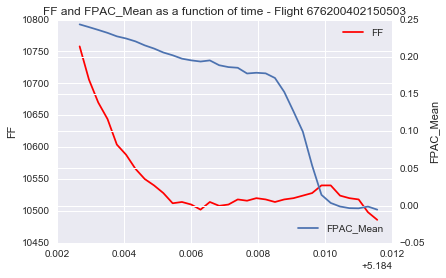

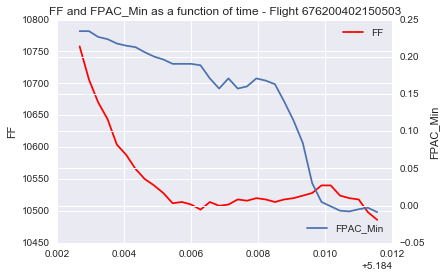

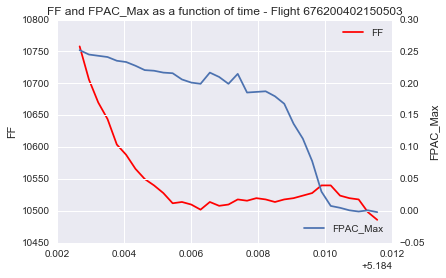

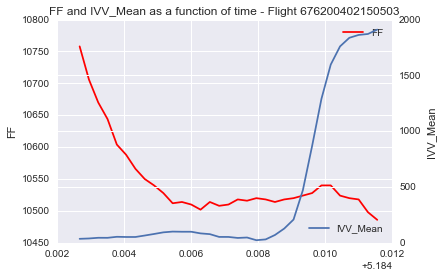

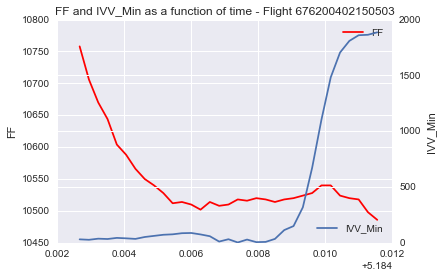

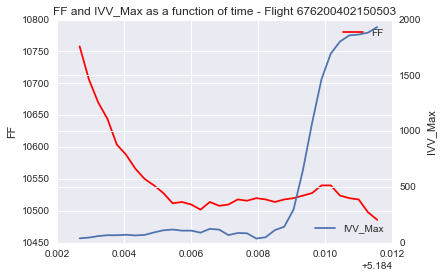

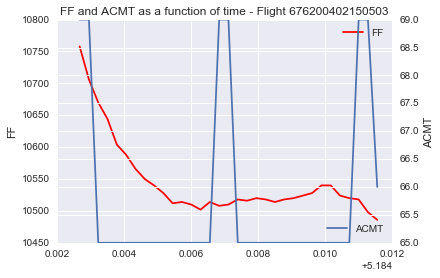

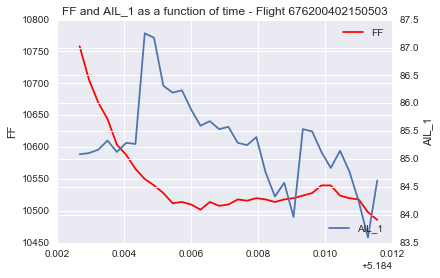

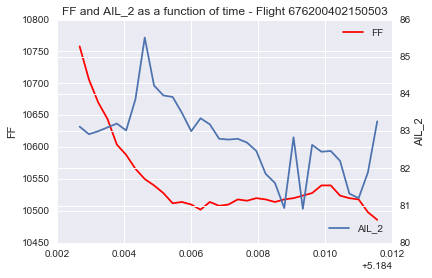

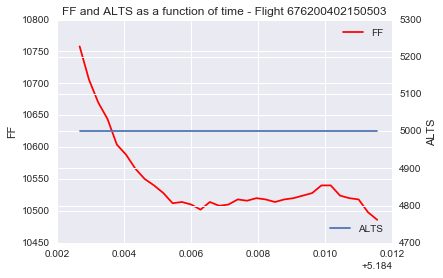

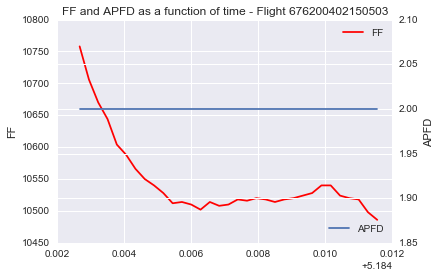

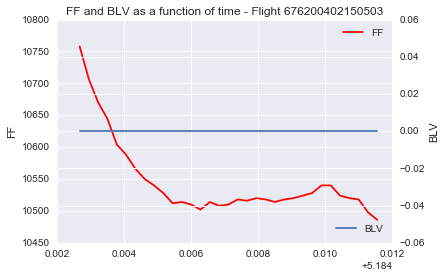

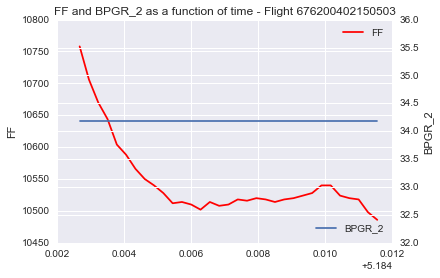

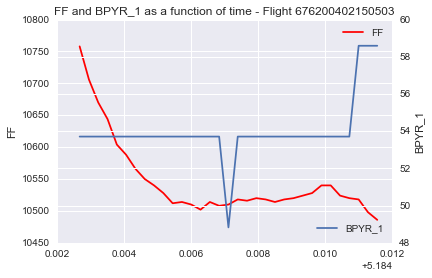

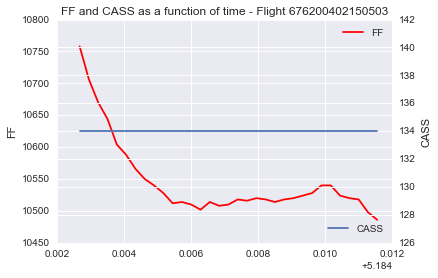

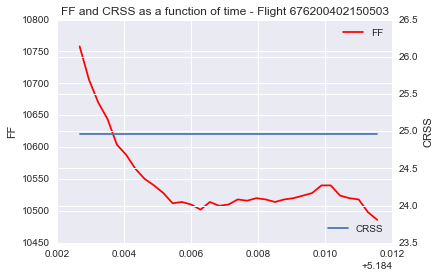

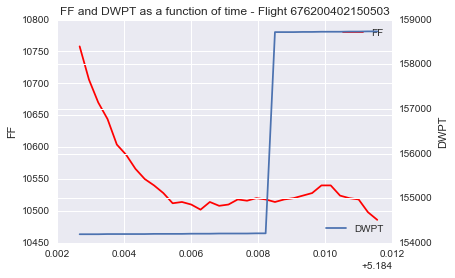

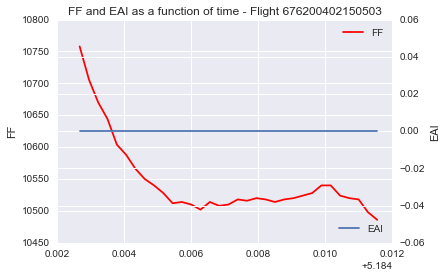

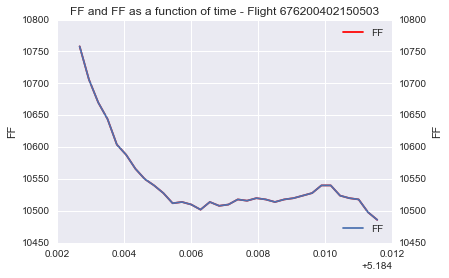

In [59]:
for feature in flight_features:
    make_dual_plot(feature, 6)

In [69]:
list_of_vars_close_to_zero_var = ['FGC3','FQTY_2','HDGS','ILSF','LMOD','MRK','PACK','TMODE','VHF1','VHF3','VMODE','VSPS',
                                  'SHKR_Mean','SHKR_Min','SHKR_Max','ALTS','APFD','BLV','BPGR_2','CASS','CRSS','EAI']

In [83]:
flight_features

['ELEV_1',
 'ELEV_2',
 'FADF',
 'FGC3',
 'FIRE_2',
 'FIRE_4',
 'FLAP',
 'FQTY_1',
 'FQTY_2',
 'FQTY_4',
 'GLS',
 'HDGS',
 'HF2',
 'HYDY',
 'ILSF',
 'LATP',
 'LMOD',
 'LOC',
 'LONP',
 'MNS',
 'MRK',
 'N1CO',
 'OIT_1',
 'OIT_2',
 'OIT_3',
 'OIT_4',
 'PACK',
 'POVT',
 'PTRM',
 'SAT',
 'SMOK',
 'SPLG',
 'SPL_1',
 'SPL_2',
 'TAT',
 'TMAG',
 'TMODE',
 'VHF1',
 'VHF3',
 'VMODE',
 'VSPS',
 'WAI_2',
 'APUF_Min',
 'CCPC_Mean',
 'CCPC_Min',
 'CCPC_Max',
 'CCPF_Mean',
 'CCPF_Min',
 'CCPF_Max',
 'CWPC_Mean',
 'CWPC_Min',
 'CWPC_Max',
 'CWPF_Mean',
 'CWPF_Min',
 'CWPF_Max',
 'MSQT_1_Mean',
 'MSQT_1_Min',
 'MSQT_1_Max',
 'MSQT_2_Mean',
 'MSQT_2_Min',
 'MSQT_2_Max',
 'PI_Mean',
 'PI_Min',
 'PI_Max',
 'PS_Mean',
 'PS_Min',
 'PS_Max',
 'PSA_Mean',
 'PSA_Min',
 'PSA_Max',
 'PT_Mean',
 'PT_Min',
 'PT_Max',
 'RUDD_Mean',
 'RUDD_Min',
 'RUDD_Max',
 'RUDP_Mean',
 'RUDP_Min',
 'RUDP_Max',
 'SHKR_Mean',
 'SHKR_Min',
 'SHKR_Max',
 'TOCW_Min',
 'ALT_Mean',
 'ALT_Min',
 'ALT_Max',
 'ALTR_Mean',
 'ALTR_Min',
 'ALT

In [ ]:
pdf = matplotlib.backends.backend_pdf.PdfPages("E:\data\output.pdf")

for feature in flight_features:
    if feature not in list_of_vars_close_to_zero_var:
        make_dual_plot(feature, 6)
        
pdf.close()

In [ ]:
### RE-RUN everything ### Changing Time Notation to read into delay in seconds required

In [64]:
# Create new column for min and sec as a decimal. For example 1 min 20 sec would be 1.3
import copy
data_p3_sample = copy.deepcopy(data_p2_sample)
del data_p3_sample['hour_min']
data_p3_sample['total_sec'] = data_p3_sample['Hour'].map(int) * 3600+ data_p3_sample['Minute'].map(int) *60 + data_p3_sample['Second'].map(int)
print data_p2_sample.shape
print data_p3_sample.shape

(6754, 181)
(6754, 181)


In [61]:
data_p3_sample.columns.values

array(['Flight_instance_ID', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'ELEV_1', 'ELEV_2', 'FGC3', 'FLAP', 'FQTY_1', 'FQTY_2', 'FQTY_4',
       'GLS', 'HDGS', 'ILSF', 'LATP', 'LMOD', 'LOC', 'LONP', 'MNS', 'MRK',
       'OIT_1', 'OIT_2', 'OIT_3', 'OIT_4', 'PACK', 'PTRM', 'SAT', 'SPL_1',
       'SPL_2', 'TAT', 'TMODE', 'VHF1', 'VHF3', 'VMODE', 'VSPS',
       'CCPC_Mean', 'CCPC_Min', 'CCPC_Max', 'CCPF_Mean', 'CCPF_Min',
       'CCPF_Max', 'CWPC_Mean', 'CWPC_Min', 'CWPC_Max', 'CWPF_Mean',
       'CWPF_Min', 'CWPF_Max', 'MSQT_1_Mean', 'MSQT_1_Min', 'MSQT_1_Max',
       'MSQT_2_Mean', 'MSQT_2_Min', 'MSQT_2_Max', 'PI_Mean', 'PI_Min',
       'PI_Max', 'PS_Mean', 'PS_Min', 'PS_Max', 'PSA_Mean', 'PSA_Min',
       'PSA_Max', 'PT_Mean', 'PT_Min', 'PT_Max', 'RUDD_Mean', 'RUDD_Min',
       'RUDD_Max', 'RUDP_Mean', 'RUDP_Min', 'RUDP_Max', 'SHKR_Mean',
       'SHKR_Min', 'SHKR_Max', 'ALT_Mean', 'ALT_Min', 'ALT_Max',
       'ALTR_Mean', 'ALTR_Min', 'ALTR_Max', 'AOA1_Mean', 'AOA1_Min',
       '

In [62]:
# Import the necessary modules and libraries
for  i in ['Flight_instance_ID', 'Month', 'Day', 'Hour', 'Minute', 'Second','min_sec','total_sec']:
    del data_p3_sample[i]
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Create a random dataset
X = copy.deepcopy(data_p3_sample)
del X['FF']
y = data_p3_sample['FF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

print math.sqrt(np.mean(((y_1-y_test)** 2)))
print math.sqrt(np.mean(((y_2-y_test)** 2)))
print math.sqrt(np.mean(((regr_1.predict(X_train)-y_train)** 2)))
print math.sqrt(np.mean(((regr_2.predict(X_train)-y_train)** 2)))

484.602986895
403.819702218
454.048230289
347.016344533


In [65]:
# Make Flight Instance ID a string
data_p3_sample['Flight_instance_ID'] = data_p3_sample['Flight_instance_ID'].map(lambda x: str("{}".format(x)))

# List of flight indexes for each flight instance
test_indexes = list(enumerate(data_p3_sample['Flight_instance_ID'].unique()))

# Create function to search for flight index if you only know the flight instance
def get_flight_instance_index(instance_num):
    index_match = [index for index, instance in test_indexes if instance_num == instance]
    return "".join(str(index_match[0]))
# Create function to plot 
def make_dual_plot(feature, flight_index):  
    test_instance = data_p3_sample['Flight_instance_ID'].unique()[flight_index]
    test_flight_data = data_p3_sample[data_p3_sample['Flight_instance_ID'] == test_instance]
    # Fuel Flow
    fig2, ax1 = plt.subplots()
    x = test_flight_data['total_sec']
    y1_ff = test_flight_data['FF']
    ax1.plot(x,y1_ff, color='r')
    ax1.set_ylabel('FF')
    plt.legend(loc=1)
    # Second variable
    y2_variable = feature
    y2 = test_flight_data[y2_variable].astype(float)
    ax2 = ax1.twinx()
    ax2.plot(x,y2)
    ax2.set_ylabel(y2_variable)
    plt.legend(loc=4)
    
    plt.title("FF and {} as a function of time - Flight {}".format(y2_variable, test_instance))
    #pdf.savefig( fig2 )
#     print "Test Instance:", "ID:",get_flight_instance_index(test_instance),"Instance:",test_instance
    
# print test_indexes[9]

var_gt1=[]
var_eq1=[]
for i in data_p3_sample.columns.values:
    if (data_p3_sample[i].unique().shape[0])>1:
        var_gt1.append(i)
    else: 
        var_eq1.append(i)      


In [66]:
##need to run multiple times##
flight_features = list(flight_features)
for i in flight_features:
    if i in var_eq1:
        flight_features.remove(i)
len(flight_features)

173

KeyError: 'FADF'

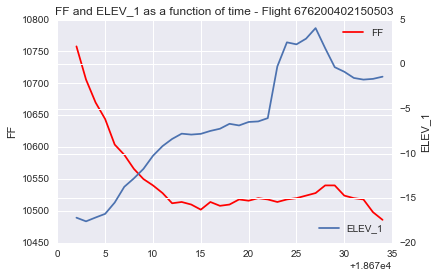

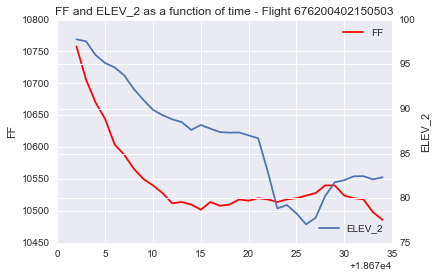

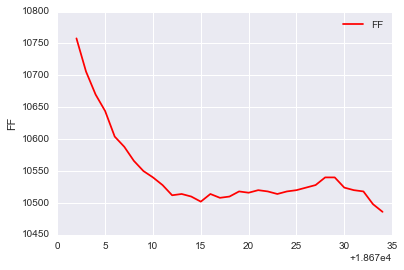

In [69]:
pdf = matplotlib.backends.backend_pdf.PdfPages("E:\data\output2.pdf")
for feature in flight_features:
    if feature not in list_of_vars_close_to_zero_var:
        make_dual_plot(feature, 6)
        
pdf.close()

In [67]:
pdf = matplotlib.backends.backend_pdf.PdfPages("E:\data\output3_ff_vs_feature.pdf")
for feature in flight_features:
    if feature not in list_of_vars_close_to_zero_var:
        fig3 = plt.figure()
        plt.plot(data_p3_sample[feature][data_p3_sample['Flight_instance_ID']=='676200402150503'],data_p3_sample['FF'][data_p3_sample['Flight_instance_ID']=='676200402150503'] )
        plt.xlabel(feature)
        plt.ylabel("Fuel Flow")
        plt.title("FF vs "+feature+" : Flight  = 676200402150503")    
        
        pdf.savefig(fig3)
pdf.close()

NameError: name 'list_of_vars_close_to_zero_var' is not defined

In [68]:
def count_null(item):
    if item is None:
        return 1
    else:
        return 0

def check_nulls(data_set):
    none_counter = 0
    for i in range(len(data_set.columns.values)):
        if sum(data_p2_sample.iloc[:,i].map(count_null)) > 0:
            print data_set.columns.values[i], sum(data_set.iloc[:,i].map(count_null))
            none_counter += 1
    if none_counter == 0:
        print "No nulls"
        
check_nulls(data_p3_sample)

No nulls


In [71]:
# Correlation matrixx
import copy
new_feature_list = []
for i in flight_features:
    if i not in list_of_vars_close_to_zero_var:
        new_feature_list.append(i)
len(new_feature_list)
data_p4_sample=copy.deepcopy(data_p3_sample[new_feature_list])
data_p4_sample=data_p4_sample[data_p4_sample.columns[~data_p4_sample.columns.str.contains('_Min')]]
data_p4_sample=data_p4_sample[data_p4_sample.columns[~data_p4_sample.columns.str.contains('_Max')]]

#del data_p4_sample['Flight_instance_ID']
data_p4_sample.shape

(6754, 67)

In [72]:
for i in data_p4_sample.columns.values:
    data_p4_sample[i].astype(float)
#del data_p4_sample['Month']
#del data_p4_sample['Minute']
#del data_p4_sample['Second']

data_p4_sample.columns.values

array(['ELEV_1', 'ELEV_2', 'FLAP', 'FQTY_1', 'FQTY_4', 'GLS', 'LATP',
       'LOC', 'LONP', 'MNS', 'OIT_1', 'OIT_2', 'OIT_3', 'OIT_4', 'PTRM',
       'SAT', 'SPL_1', 'SPL_2', 'TAT', 'CCPC_Mean', 'CCPF_Mean',
       'CWPC_Mean', 'CWPF_Mean', 'MSQT_1_Mean', 'MSQT_2_Mean', 'PI_Mean',
       'PS_Mean', 'PSA_Mean', 'PT_Mean', 'RUDD_Mean', 'RUDP_Mean',
       'ALT_Mean', 'ALTR_Mean', 'AOA1_Mean', 'AOA2_Mean', 'AOAC_Mean',
       'AOAI_Mean', 'BAL1_Mean', 'BAL2_Mean', 'CAS_Mean', 'DA_Mean',
       'GS_Mean', 'LATG_Mean', 'LONG_Mean', 'MACH_Mean', 'MH_Mean',
       'N1T_Mean', 'NSQT_Mean', 'TAS_Mean', 'TH_Mean', 'TRK_Mean',
       'TRKM_Mean', 'VIB_1_Mean', 'WD_Mean', 'WS_Mean', 'RALT_Mean',
       'ROLL_Mean', 'VRTG_Mean', 'CTAC_Mean', 'FPAC_Mean', 'IVV_Mean',
       'ACMT', 'AIL_1', 'AIL_2', 'BPYR_1', 'DWPT', 'FF'], dtype=object)

In [73]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Create a random dataset
X = copy.deepcopy(data_p4_sample)
del X['FF']
y = data_p4_sample['FF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

print math.sqrt(np.mean(((y_1-y_test)** 2)))
print math.sqrt(np.mean(((y_2-y_test)** 2)))
print math.sqrt(np.mean(((regr_1.predict(X_train)-y_train)** 2)))
print math.sqrt(np.mean(((regr_2.predict(X_train)-y_train)** 2)))

550.07988736
461.45463602
530.268042356
405.392521666


550.07988736
452.462806933
530.268042356
405.392521666


In [74]:
data_p4_sample = data_p4_sample.astype(float)
data_p4_sample.dtypes
data_p4_sample.corr()

ELEV_1    ELEV_2      FLAP    FQTY_1    FQTY_4       GLS  \
ELEV_1       1.000000 -0.722329  0.009358 -0.012456 -0.018571 -0.006584   
ELEV_2      -0.722329  1.000000 -0.007413  0.035230  0.035033  0.004104   
FLAP         0.009358 -0.007413  1.000000 -0.017633 -0.012594 -0.067867   
FQTY_1      -0.012456  0.035230 -0.017633  1.000000  0.993577  0.044931   
FQTY_4      -0.018571  0.035033 -0.012594  0.993577  1.000000  0.048007   
GLS         -0.006584  0.004104 -0.067867  0.044931  0.048007  1.000000   
LATP         0.003563 -0.009384  0.063298 -0.063235 -0.057509 -0.023455   
LOC         -0.011581 -0.025461 -0.020879  0.038008  0.042492  0.005806   
LONP        -0.046340  0.066517  0.042533  0.132944  0.141865  0.063565   
MNS         -0.001647  0.030888 -0.842546  0.277164  0.271681  0.068549   
OIT_1       -0.042794  0.034985 -0.035001 -0.012363 -0.011508 -0.007382   
OIT_2       -0.050864  0.041182 -0.017634 -0.023773 -0.019423  0.010003   
OIT_3       -0.072357  0.065389 -0.008855 -0.038892 -0.038221 -0.000344   
OIT_4       -0.043031  0.031950 -0.016928 -0.034816 -0.033810 -0.010707   
PTRM        -0.080803  0.131677 -0.022903 -0.244793 -0.245698  0.013368   
SAT         -0.036358  0.036710 -0.052289 -0.096624 -0.090338  0.031671   
SPL_1        0.054103 -0.056671 -0.007730 -0.008683 -0.000073  0.034084   
SPL_2       -0.053345  0.086725  0.038156  0.087352  0.079779 -0.032592   
TAT          0.058607 -0.047198 -0.064413 -0.096337 -0.090680  0.048084   
CCPC_Mean   -0.796121  0.733668 -0.013945  0.028429  0.032371 -0.050785   
CCPF_Mean   -0.772338  0.720020 -0.004480  0.027183  0.032457 -0.044248   
CWPC_Mean   -0.062186  0.065662 -0.070152 -0.000155  0.006066 -0.001188   
CWPF_Mean    0.031831 -0.045672  0.050521  0.011679  0.004858 -0.021461   
MSQT_1_Mean  0.364067 -0.313372  0.021101 -0.009301 -0.010701  0.003325   
MSQT_2_Mean  0.363229 -0.314037  0.016266 -0.015803 -0.017823  0.002879   
PI_Mean      0.600234 -0.529676 -0.081963 -0.005072 -0.008664  0.120530   
PS_Mean     -0.034780  0.054352  0.149379  0.158555  0.160489 -0.025669   
PSA_Mean    -0.033833  0.053645  0.149533  0.158690  0.160632 -0.025689   
PT_Mean      0.385573 -0.321814  0.058524  0.117684  0.116715  0.063945   
RUDD_Mean   -0.027715  0.026727  0.010347 -0.034264 -0.031915  0.010565   
...               ...       ...       ...       ...       ...       ...   
BAL1_Mean    0.045468 -0.057331 -0.133314 -0.220159 -0.222321  0.011209   
BAL2_Mean    0.044608 -0.057138 -0.132748 -0.219241 -0.221495  0.010247   
CAS_Mean     0.524342 -0.465319 -0.073514 -0.016038 -0.018938  0.144448   
DA_Mean      0.001196  0.011494  0.015588  0.065017  0.056276 -0.015378   
GS_Mean      0.488080 -0.434550 -0.047332 -0.021209 -0.022894  0.165319   
LATG_Mean    0.039171 -0.046969 -0.037105  0.025321  0.026865 -0.001993   
LONG_Mean    0.110628 -0.092586 -0.046487 -0.059851 -0.063581 -0.055659   
MACH_Mean    0.481056 -0.428668 -0.060652 -0.023828 -0.026408  0.169533   
MH_Mean      0.013849 -0.040485  0.022255  0.127279  0.139054 -0.051065   
N1T_Mean    -0.590467  0.514040 -0.013498  0.068992  0.069897 -0.032688   
NSQT_Mean    0.633114 -0.562673  0.009407 -0.037893 -0.040926  0.036129   
TAS_Mean     0.584959 -0.519629 -0.058783 -0.016484 -0.019368  0.103132   
TH_Mean      0.016804 -0.044037  0.021917  0.128094  0.138906 -0.051152   
TRK_Mean     0.019900 -0.047617  0.018788  0.115816  0.126790 -0.062042   
TRKM_Mean    0.013866 -0.040321  0.022466  0.128157  0.139809 -0.051268   
VIB_1_Mean  -0.282146  0.239985  0.124131  0.015807  0.011012  0.005532   
WD_Mean     -0.033864  0.015443  0.051833  0.105202  0.109976 -0.018225   
WS_Mean      0.159005 -0.144656  0.039154 -0.061994 -0.065731 -0.033223   
RALT_Mean    0.277635 -0.254522  0.022048 -0.036488 -0.038674  0.051137   
ROLL_Mean   -0.168374  0.148293 -0.003242  0.024091  0.026928  0.018578   
VRTG_Mean    0.074504 -0.084772 -0.031623  0.023778  0.033755 -0.018229   
CTAC_Mean   -0.031448  0.017233  0.00665

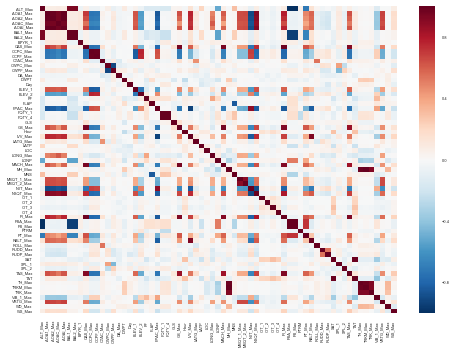

In [353]:
pdf = matplotlib.backends.backend_pdf.PdfPages("E:\data\correlation_matrix.pdf")
matplotlib.style.use('ggplot')
import seaborn as sns
corr = data_p4_sample.corr()
fig4=plt.figure()
sns.set(font_scale=0.4)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,label='small')
pdf.savefig(fig4)
pdf.close()

In [38]:
from scipy import stats
def optimum_lag(var):
    maximum=0
    minimum=0
    index_min =0
    index_max =0
    for i in range(1,100):
        var_new=data_p4_sample[var].shift(i)
        if abs(stats.spearmanr(data_p4_sample['FF'], var_new)[0]) > abs(stats.spearmanr(data_p4_sample['FF'], data_p4_sample[var])[0]):
            corr =  stats.spearmanr(data_p4_sample['FF'], var_new)[0]
            if abs(corr)<abs(minimum):
                minimum = corr
                index_min =i
            elif abs(corr)>abs(maximum):
                maximum = corr
                index_max=i
    #return index_min, index_max,minimum, maximum#,  data_p4_sample[var].shift(index_max)
            return maximum, index_max, (abs(stats.spearmanr(data_p4_sample['FF'], var_new)[0]) - abs(stats.spearmanr(data_p4_sample['FF'], data_p4_sample[var])[0]))
            
for i in data_p4_sample.columns:
    if i !='FF':
        print i +' '+  str(optimum_lag(i))

ELEV_1 None
ELEV_2 (-0.064375289998975946, 12, 0.0017775879851691517)
FIRE_4 None
FLAP (0.11523387553225858, 3, 0.00028180330056892799)
FQTY_1 None
FQTY_4 None
GLS (0.047549430053834989, 79, 0.0018378922480086907)
HYDY None
LATP (0.010388678260530226, 1, 0.0016469139347436261)
LOC (-0.01185076331066014, 12, 0.0019488716278349069)
LONP None
MNS (0.02215394628036714, 5, 0.00055808525033088086)
OIT_1 (-0.19934216718422262, 3, 0.00045491349569082296)
OIT_2 (-0.18911199445955801, 2, 0.00060483554973153608)
OIT_3 (-0.19837382209322207, 2, 0.00080341437583922315)
OIT_4 (-0.21429710264252777, 3, 0.0033963251989221899)
PTRM None
SAT None
SPLG None
SPL_1 (-0.096716575509789973, 1, 0.0028221284579964256)
SPL_2 None
TAT None
CCPC_Mean (-0.071261180299270116, 12, 0.0029699689139294355)
CCPF_Mean None
CWPC_Mean (-0.024903689152416794, 2, 0.0032031389655370925)
CWPF_Mean (0.022134507770932371, 1, 0.0024405697363606635)
MSQT_1_Mean (0.024143647866860476, 6, 0.014054672310781845)
MSQT_2_Mean (-0.006347

In [75]:
## creating lag variables##
lag_amount=5
print data_p4_sample.columns.values

['ELEV_1' 'ELEV_2' 'FLAP' 'FQTY_1' 'FQTY_4' 'GLS' 'LATP' 'LOC' 'LONP' 'MNS'
 'OIT_1' 'OIT_2' 'OIT_3' 'OIT_4' 'PTRM' 'SAT' 'SPL_1' 'SPL_2' 'TAT'
 'CCPC_Mean' 'CCPF_Mean' 'CWPC_Mean' 'CWPF_Mean' 'MSQT_1_Mean'
 'MSQT_2_Mean' 'PI_Mean' 'PS_Mean' 'PSA_Mean' 'PT_Mean' 'RUDD_Mean'
 'RUDP_Mean' 'ALT_Mean' 'ALTR_Mean' 'AOA1_Mean' 'AOA2_Mean' 'AOAC_Mean'
 'AOAI_Mean' 'BAL1_Mean' 'BAL2_Mean' 'CAS_Mean' 'DA_Mean' 'GS_Mean'
 'LATG_Mean' 'LONG_Mean' 'MACH_Mean' 'MH_Mean' 'N1T_Mean' 'NSQT_Mean'
 'TAS_Mean' 'TH_Mean' 'TRK_Mean' 'TRKM_Mean' 'VIB_1_Mean' 'WD_Mean'
 'WS_Mean' 'RALT_Mean' 'ROLL_Mean' 'VRTG_Mean' 'CTAC_Mean' 'FPAC_Mean'
 'IVV_Mean' 'ACMT' 'AIL_1' 'AIL_2' 'BPYR_1' 'DWPT' 'FF']


In [77]:
## creating lag variables##
lag_amount=5
print data_p4_sample.columns.values
vars_to_lag=['ALT_Mean', 'AOA1_Mean', 'BAL1_Mean', 'BPYR_1', 'CCPC_Mean',  'CTAC_Mean', 'CWPC_Mean', 'CWPF_Mean', 'DA_Mean',
             'DWPT', 'ELEV_1', 'ELEV_2',  'FLAP', 'FPAC_Mean', 'FQTY_1', 'FQTY_4', 'GLS',  'IVV_Mean',  'LOC', 'LONG_Mean',
             'MNS', 'MSQT_1_Mean', 'N1T_Mean', 'NSQT_Mean',  'PI_Mean', 'PSA_Mean', 'PTRM', 'PT_Mean', 'RALT_Mean', 'ROLL_Mean',
             'SAT', 'SPL_1', 'VIB_1_Mean', 'VRTG_Mean' ]

for i in vars_to_lag:
    data_p4_sample[i+"_lagged_5"] =data_p4_sample[i].shift(lag_amount)
data_p4_sample.columns.values

['ELEV_1' 'ELEV_2' 'FLAP' 'FQTY_1' 'FQTY_4' 'GLS' 'LATP' 'LOC' 'LONP' 'MNS'
 'OIT_1' 'OIT_2' 'OIT_3' 'OIT_4' 'PTRM' 'SAT' 'SPL_1' 'SPL_2' 'TAT'
 'CCPC_Mean' 'CCPF_Mean' 'CWPC_Mean' 'CWPF_Mean' 'MSQT_1_Mean'
 'MSQT_2_Mean' 'PI_Mean' 'PS_Mean' 'PSA_Mean' 'PT_Mean' 'RUDD_Mean'
 'RUDP_Mean' 'ALT_Mean' 'ALTR_Mean' 'AOA1_Mean' 'AOA2_Mean' 'AOAC_Mean'
 'AOAI_Mean' 'BAL1_Mean' 'BAL2_Mean' 'CAS_Mean' 'DA_Mean' 'GS_Mean'
 'LATG_Mean' 'LONG_Mean' 'MACH_Mean' 'MH_Mean' 'N1T_Mean' 'NSQT_Mean'
 'TAS_Mean' 'TH_Mean' 'TRK_Mean' 'TRKM_Mean' 'VIB_1_Mean' 'WD_Mean'
 'WS_Mean' 'RALT_Mean' 'ROLL_Mean' 'VRTG_Mean' 'CTAC_Mean' 'FPAC_Mean'
 'IVV_Mean' 'ACMT' 'AIL_1' 'AIL_2' 'BPYR_1' 'DWPT' 'FF']


array(['ELEV_1', 'ELEV_2', 'FLAP', 'FQTY_1', 'FQTY_4', 'GLS', 'LATP',
       'LOC', 'LONP', 'MNS', 'OIT_1', 'OIT_2', 'OIT_3', 'OIT_4', 'PTRM',
       'SAT', 'SPL_1', 'SPL_2', 'TAT', 'CCPC_Mean', 'CCPF_Mean',
       'CWPC_Mean', 'CWPF_Mean', 'MSQT_1_Mean', 'MSQT_2_Mean', 'PI_Mean',
       'PS_Mean', 'PSA_Mean', 'PT_Mean', 'RUDD_Mean', 'RUDP_Mean',
       'ALT_Mean', 'ALTR_Mean', 'AOA1_Mean', 'AOA2_Mean', 'AOAC_Mean',
       'AOAI_Mean', 'BAL1_Mean', 'BAL2_Mean', 'CAS_Mean', 'DA_Mean',
       'GS_Mean', 'LATG_Mean', 'LONG_Mean', 'MACH_Mean', 'MH_Mean',
       'N1T_Mean', 'NSQT_Mean', 'TAS_Mean', 'TH_Mean', 'TRK_Mean',
       'TRKM_Mean', 'VIB_1_Mean', 'WD_Mean', 'WS_Mean', 'RALT_Mean',
       'ROLL_Mean', 'VRTG_Mean', 'CTAC_Mean', 'FPAC_Mean', 'IVV_Mean',
       'ACMT', 'AIL_1', 'AIL_2', 'BPYR_1', 'DWPT', 'FF',
       'ALT_Mean_lagged_5', 'AOA1_Mean_lagged_5', 'BAL1_Mean_lagged_5',
       'BPYR_1_lagged_5', 'CCPC_Mean_lagged_5', 'CTAC_Mean_lagged_5',
       'CWPC_Mean_lagged_5', 'CWPF_Me

In [78]:
for i in vars_to_lag:
    data_p4_sample[i+"_lagged_5"] =data_p4_sample[i].shift(lag_amount)
data_p4_sample.columns.values


array(['ELEV_1', 'ELEV_2', 'FLAP', 'FQTY_1', 'FQTY_4', 'GLS', 'LATP',
       'LOC', 'LONP', 'MNS', 'OIT_1', 'OIT_2', 'OIT_3', 'OIT_4', 'PTRM',
       'SAT', 'SPL_1', 'SPL_2', 'TAT', 'CCPC_Mean', 'CCPF_Mean',
       'CWPC_Mean', 'CWPF_Mean', 'MSQT_1_Mean', 'MSQT_2_Mean', 'PI_Mean',
       'PS_Mean', 'PSA_Mean', 'PT_Mean', 'RUDD_Mean', 'RUDP_Mean',
       'ALT_Mean', 'ALTR_Mean', 'AOA1_Mean', 'AOA2_Mean', 'AOAC_Mean',
       'AOAI_Mean', 'BAL1_Mean', 'BAL2_Mean', 'CAS_Mean', 'DA_Mean',
       'GS_Mean', 'LATG_Mean', 'LONG_Mean', 'MACH_Mean', 'MH_Mean',
       'N1T_Mean', 'NSQT_Mean', 'TAS_Mean', 'TH_Mean', 'TRK_Mean',
       'TRKM_Mean', 'VIB_1_Mean', 'WD_Mean', 'WS_Mean', 'RALT_Mean',
       'ROLL_Mean', 'VRTG_Mean', 'CTAC_Mean', 'FPAC_Mean', 'IVV_Mean',
       'ACMT', 'AIL_1', 'AIL_2', 'BPYR_1', 'DWPT', 'FF',
       'ALT_Mean_lagged_5', 'AOA1_Mean_lagged_5', 'BAL1_Mean_lagged_5',
       'BPYR_1_lagged_5', 'CCPC_Mean_lagged_5', 'CTAC_Mean_lagged_5',
       'CWPC_Mean_lagged_5', 'CWPF_Me

In [84]:
lag_amount=5

vars_to_lag=['ALT_Mean', 'AOA1_Mean', 'BAL1_Mean', 'BPYR_1', 'CCPC_Mean',  'CTAC_Mean', 'CWPC_Mean', 'CWPF_Mean', 'DA_Mean',
             'DWPT', 'ELEV_1', 'ELEV_2',  'FLAP', 'FPAC_Mean', 'FQTY_1', 'FQTY_4', 'GLS',  'IVV_Mean',  'LOC', 'LONG_Mean',
             'MNS', 'MSQT_1_Mean', 'N1T_Mean', 'NSQT_Mean',  'PI_Mean', 'PSA_Mean', 'PTRM', 'PT_Mean', 'RALT_Mean', 'ROLL_Mean',
             'SAT', 'SPL_1', 'VIB_1_Mean', 'VRTG_Mean' ]
data_p5_test = pd.read_csv('E:/data/ph_3_test.csv').iloc[:,3:].drop(['id'], axis=1)

exclude_var=['ACID','Flight_instance_ID','Year','Month','Day','Hour','Minute','Second']
for i in exclude_var:
    del data_p5_test[i]

for i in vars_to_lag:
    data_p5_test[i+"_lagged_5"] =data_p5_test[i].shift(lag_amount)

data_p5_test = data_p5_test.ix[6:,]

In [85]:
# Run model with reduced features
import time
# Sample data
data_p5_clean = data_p4_sample

from sklearn.ensemble import RandomForestRegressor

# Get avg RMSE of 5-fold CV
class rfError:
    def __init__(self):
        self.rmse = None
        self.ymean = None
        self.mape = None
    def cv_rf(self, 
              df_train, 
              df_test, 
              sample = None):
        
        if sample == None:
            sample = 1
        else:
            sample = sample
        rf = RandomForestRegressor(n_estimators = 100)
        
        rmse_store = []
        y_mean_store = []

        df_train = df_train.sample(frac=sample, random_state=42)

        
        X_train = df_train.drop(['FF'],axis=1)
        y_train = df_train['FF']
        train_columns = X_train.columns
#         X_test =  df_test.ix[:,8:].drop(['FF'], axis=1).drop(remove_control(),axis=1)
        X_test = df_test[train_columns]
        y_test = df_test['FF']
            
        rf.fit(X_train,y_train)
        rmse = (np.mean((rf.predict(X_test) - y_test)**2))**0.5
        rmse_store.append(rmse)
        y_mean_store.append(np.mean(y_test))
            
        self.rmse = np.mean(rmse_store)
        self.ymean = np.mean(y_mean_store)
        self.mape = np.mean(1.0 * self.rmse / self.ymean)

t0 = time.time()

# Initialize function
rfe2 = rfError()
# Fit and predict model
rfe2.cv_rf(data_p5_clean, data_p5_test, sample=1)
print rfe2.rmse
print rfe2.mape
t1 = time.time()

print (1.0 * t1 - t0)  / 60, 'minutes'

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [79]:
data_p4_sample.to_csv("E:\data\processd_data_phase_3_new.csv")

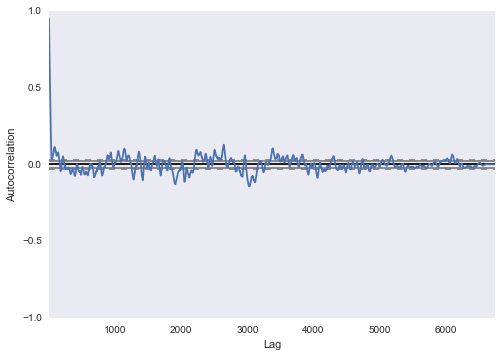

In [379]:
from pandas.tools.plotting import autocorrelation_plot
sns.set(font_scale=1)
plt.figure()
autocorrelation_plot(data_p4_sample['FF'])


In [ ]:
g = sns.FacetGrid(data_p4_sample, row="FQTY_1", col="FF", margin_titles=True)
g.map(sns.regplot, "FF", "FQTY_1", order=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000201D935C0>,
        ...,
        ...,
        ...,
       ..., 
        ...,
        ...,
        ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000004087D6E48>]], dtype=object)

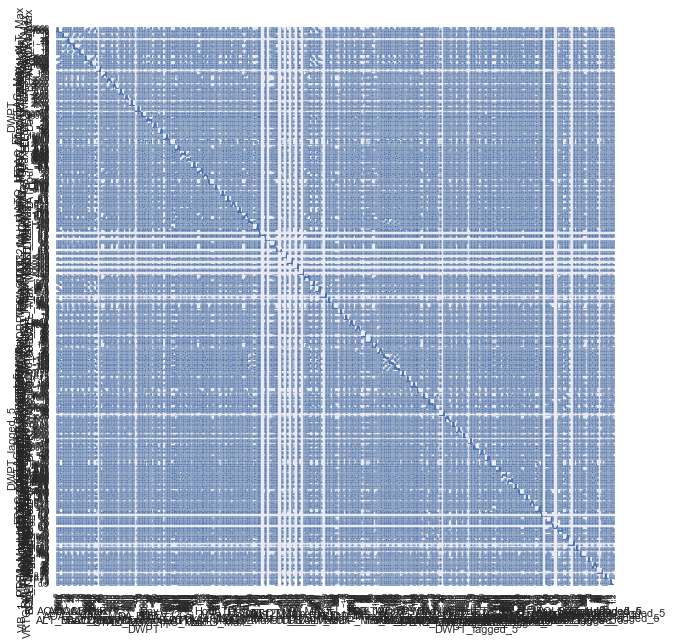

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data_p4_sample, alpha=0.2, figsize=(10, 10), diagonal='kde')


In [ ]:
data_p4_sample.plot.hexbin(x='FF', gridsize=25)


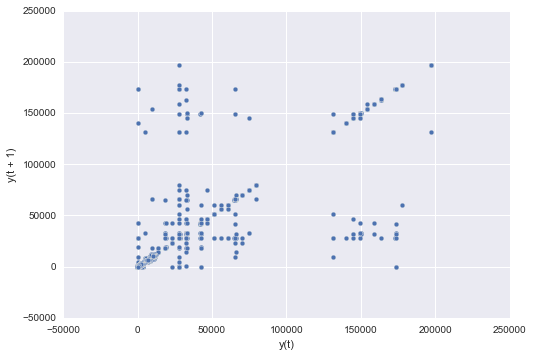

In [383]:
from pandas.tools.plotting import lag_plot
plt.figure()
lag_plot(data_p4_sample)
